In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in datasets
all_persons = pd.read_csv('Occupation_Gender_All_Persons_16_21.csv')

# copy all_persons data set and print the first 5 rows
all_persons_copy = all_persons.copy()
all_persons_copy.head()

,Region,Year,Information Technology and Telecommunications,Specialist Managers,Project and Programme Managers,"Business Analysts, Architects and System Designers",Programmers and Software Development Professionals,Web design and development professionals,Information Technology and Telecommunications Professionals n.e.c
0,East,2016-2017,13400,18900,9900,11500,28900,7600,19900
1,East,2017-2018,10100,17800,9500,15800,28700,4900,19500
2,East,2018-2019,13600,17600,4300,11500,38500,4500,24800
3,East,2019-2020,18000,26100,5000,11500,41100,7600,16200
4,East,2020-2021,16300,21300,7600,19900,47100,8700,23000


In [3]:
# Data sets have integer or object(string) values
# We can see that 2 columns has categorical data and all the other columns are of a numeric type (int 64) with non-Null entries.
all_persons_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Region                                                             60 non-null     object
 1   Year                                                               60 non-null     object
 2   Information Technology and Telecommunications                      60 non-null     int64 
 3   Specialist Managers                                                60 non-null     int64 
 4   Project and Programme Managers                                     60 non-null     int64 
 5   Business Analysts, Architects and System Designers                 60 non-null     int64 
 6   Programmers and Software Development Professionals                 60 non-null     int64 
 7   Web design and development professiona

In [4]:
# dataset consist of 60 rows and 9 columns

print(all_persons_copy.shape)

(60, 9)


In [5]:
# check labels for each column for  data set

print('all_persons', all_persons_copy.columns.values)

all_persons ['Region' 'Year' 'Information Technology and Telecommunications'
 'Specialist Managers' 'Project and Programme Managers'
 'Business Analysts, Architects and System Designers'
 'Programmers and Software Development Professionals'
 'Web design and development professionals'
 'Information Technology and Telecommunications Professionals n.e.c']


### Describe the datasets to get a statistical summary of the dataset 

In [6]:
# examine data
all_persons_copy.describe()

,Information Technology and Telecommunications,Specialist Managers,Project and Programme Managers,"Business Analysts, Architects and System Designers",Programmers and Software Development Professionals,Web design and development professionals,Information Technology and Telecommunications Professionals n.e.c
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,9536.666667,17335.000000,6256.666667,12451.666667,30566.666667,5385.000000,16893.333333
std,8010.691302,12129.105281,4924.906148,10293.316767,23913.911040,3963.042189,13361.605337
min,0.000000,1800.000000,600.000000,2000.000000,5600.000000,0.000000,3700.000000
25%,3875.000000,9875.000000,2575.000000,5975.000000,14000.000000,2500.000000,7850.000000
50%,7300.000000,14700.000000,5100.000000,9650.000000,23650.000000,4500.000000,13200.000000
75%,11800.000000,19725.000000,7925.000000,15725.000000,33950.000000,7300.000000,18900.000000
max,33400.000000,50400.000000,23600.000000,53800.000000,102300.000000,17600.000000,53300.000000


### Need to remove the rows or columns with 0 values for analysis --> doesn't correlate with the rest of the data.
### There may have been values higher than zero but they have not been included


In [7]:
# drop rows with 0 values to get a more accurate descripition of all the datasets as 0 appears to be a 'min' value for all datasets and that is not a correct representation of the actual figure/count

# drop '0' values for all_persons
all_persons_copy = all_persons_copy.loc[(all_persons_copy['Information Technology and Telecommunications'] != 0) & 
                     (all_persons_copy['Web design and development professionals'] != 0)]


all_persons_copy.shape

(58, 9)

In [8]:
# examine the data again and perform a very simple explanatory analysis

all_persons_copy.describe()

'''
mean value is more than median across all the sectors

large difference between 75% and max value --> outliers?
'''

'\nmean value is more than median across all the sectors\n\nlarge difference between 75% and max value --> outliers?\n'

### Analysis on All Persons Datasets

# Plotting Graphs

In [9]:
# Create a pivot_table indexed by Region then Year for each sector
all_persons_copy_pivot = pd.pivot_table(all_persons_copy,index=["Region","Year"])

all_persons_copy_pivot.head(10)

Business Analysts, Architects and System Designers  \
Region        Year                                                            
East          2016-2017                                              11500    
              2017-2018                                              15800    
              2018-2019                                              11500    
              2019-2020                                              11500    
              2020-2021                                              19900    
East Midlands 2016-2017                                               6000    
              2017-2018                                               7300    
              2018-2019                                               9700    
              2019-2020                                               9600    
              2020-2021                                               9300    

                         Information Technology and Telecommunications  \
Region        Year                                                       
East          2016-2017                                          13400   
              2017-2018                                          10100   
              2018-2019                                          13600   
              2019-2020                                          18000   
              2020-2021                                          16300   
East Midlands 2016-2017                                           5000   
              2017-2018                                           5400   
              2018-2019                                           8600   
              2019-2020                                           5500   
              2020-2021                                           7400   

                         Information Technology and Telecommunications Professionals n.e.c  \
Region        Year                                                                           
East          2016-2017                                              19900                   
              2017-2018                                              19500                   
              2018-2019                                              24800                   
              2019-2020                                              16200                   
              2020-2021                                              23000                   
East Midlands 2016-2017                                              10000                   
              2017-2018                                               7100                   
              2018-2019                                              10200                   
              2019-2020                                              12600                   
              2020-2021                                              13700                   

                         Programmers and Software Development Professionals  \
Region        Year                                                            
East          2016-2017                                              28900    
              2017-2018                                              28700    
              2018-2019                                              38500    
              2019-2020                                              41100    
              2020-2021                                              47100    
East Midlands 2016-2017                                              19000    
              2017-2018                                              17300    
              2018-2019                                              16500    
              2019-2020                                              14700    
              2020-2021                                              22000    

                         Project and Programme Managers  Specialist Managers  \
Region        Year           

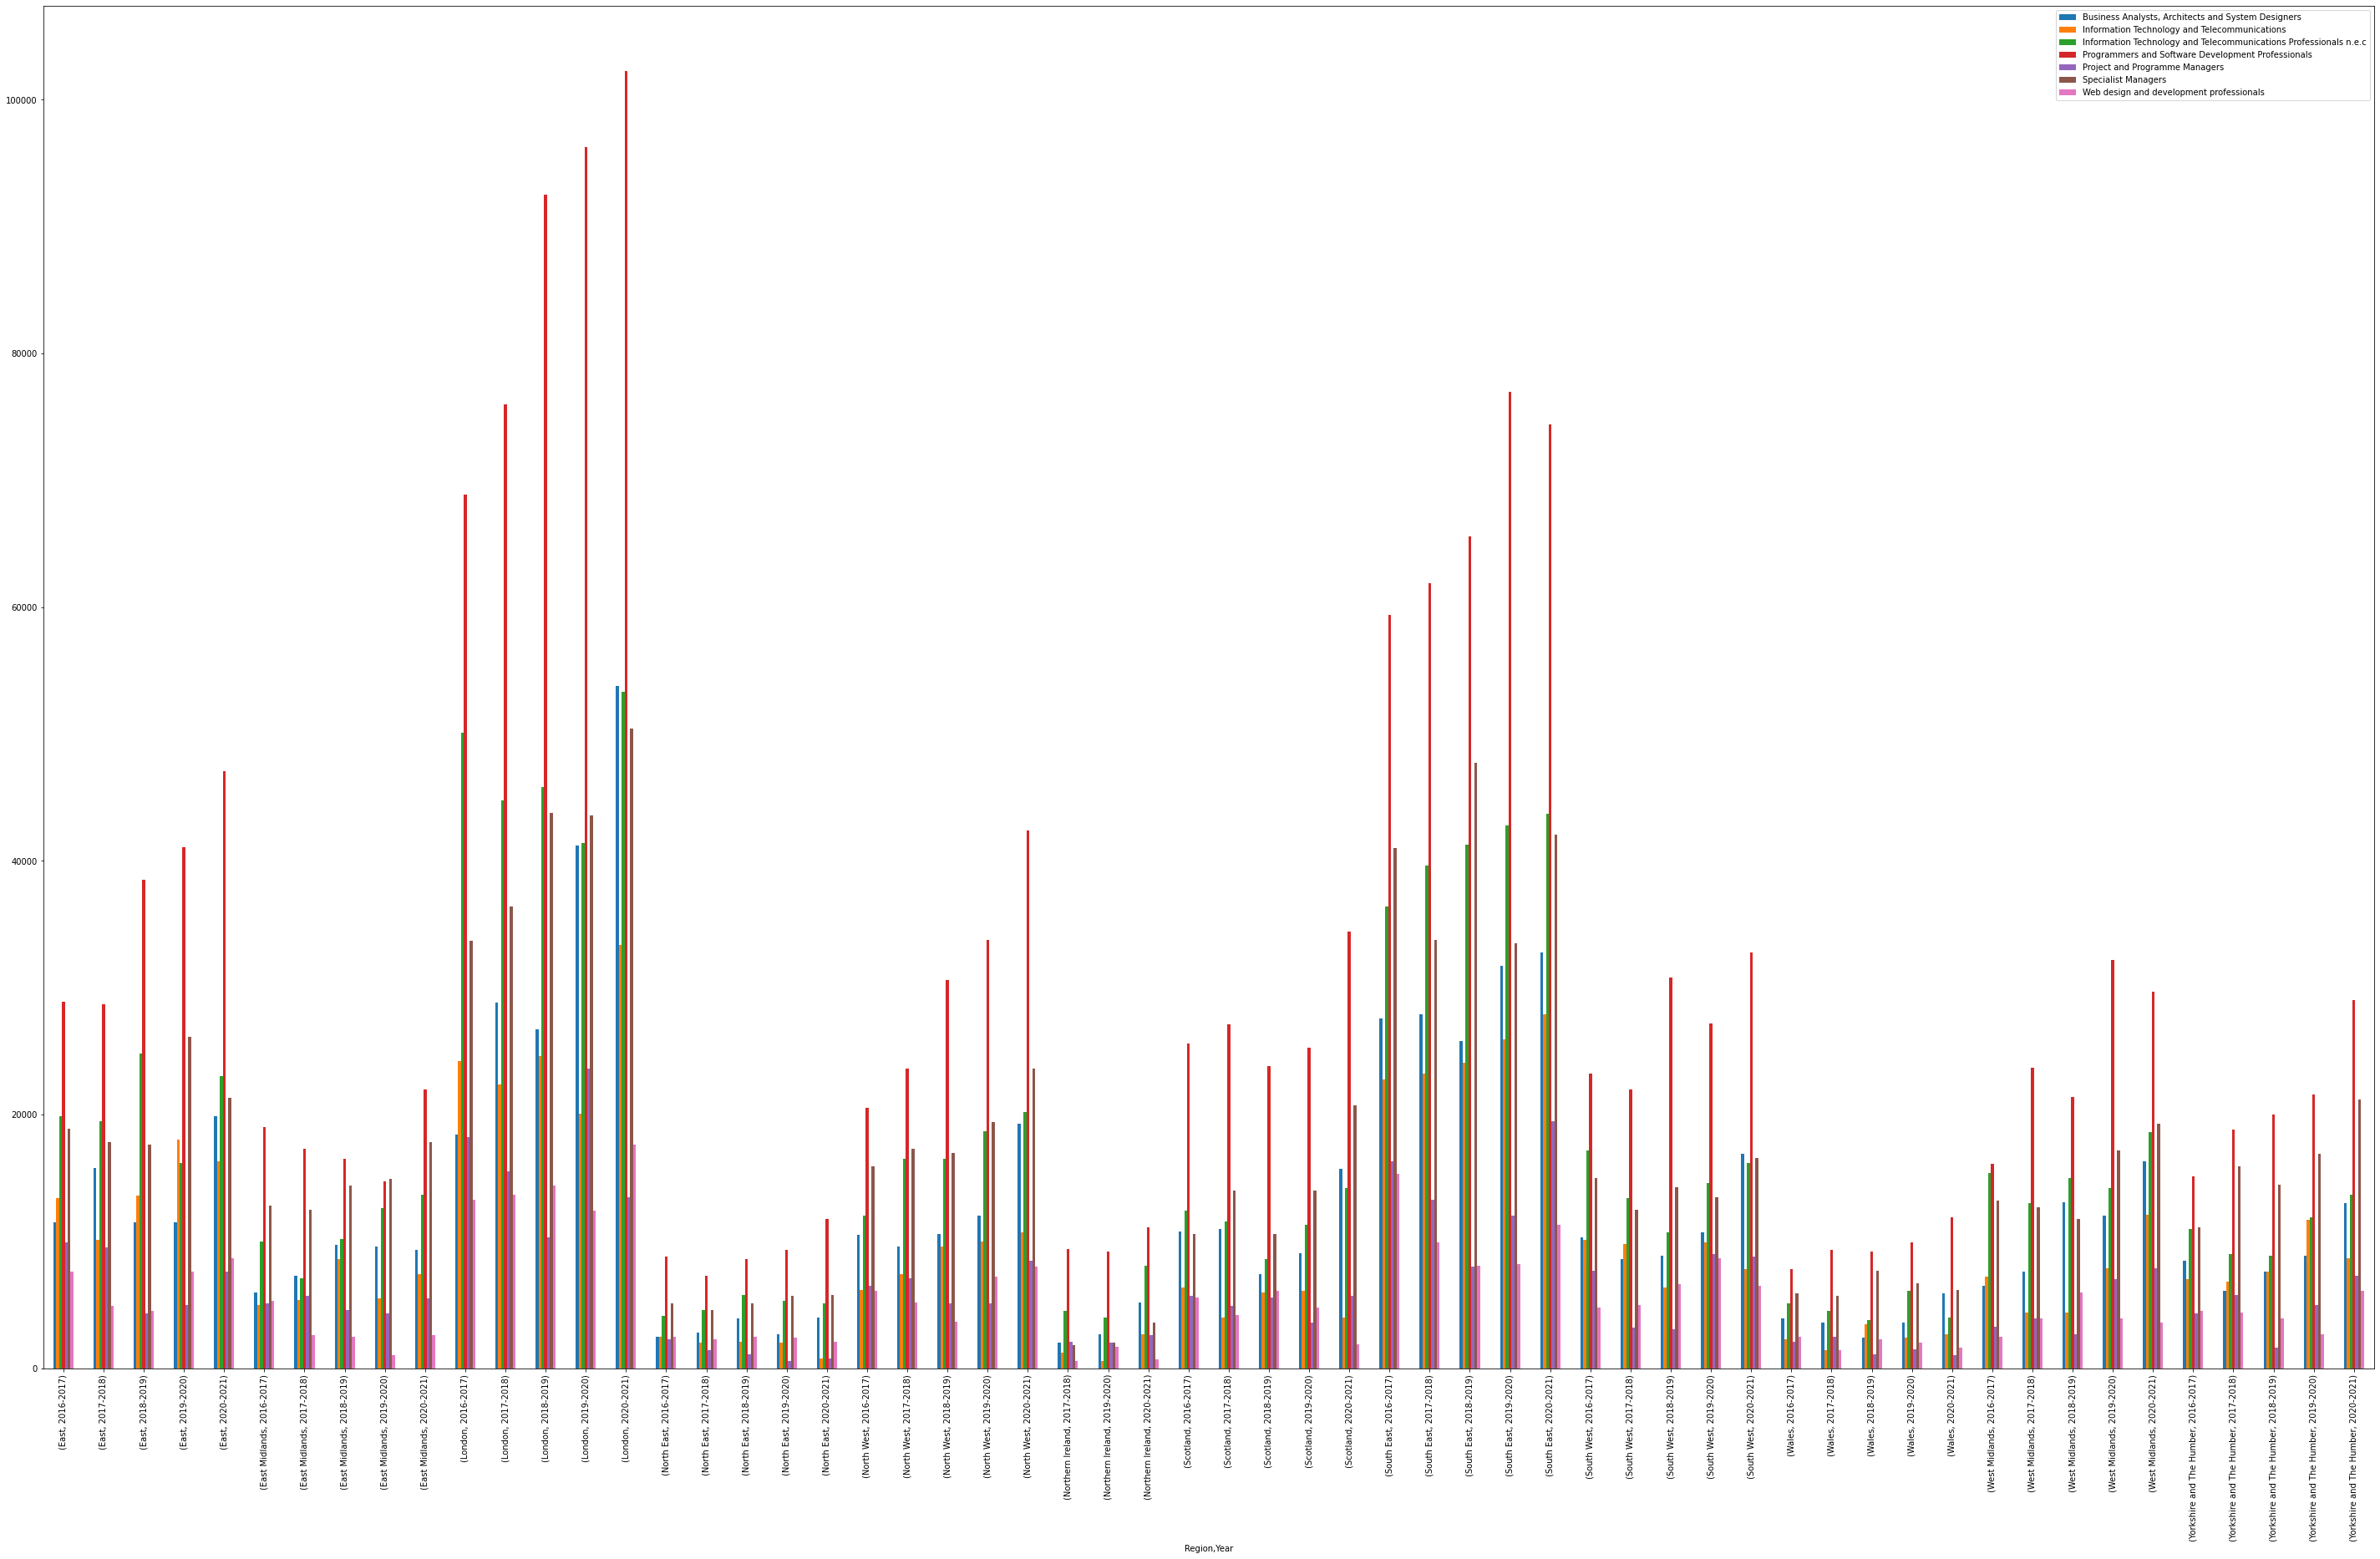

In [10]:
# Difficult to interpret because there is a lot of data on one graph
# Good way to visualise the number of people in each sector in each region and to see the change from 2016-2021
# Needs to be split up to draw accurate insights

ax = all_persons_copy_pivot.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(50, 30)

plt.show()

array([[<AxesSubplot:title={'center':'Business Analysts, Architects and System Designers'}, xlabel='Region,Year'>,
        <AxesSubplot:title={'center':'Information Technology and Telecommunications'}, xlabel='Region,Year'>,
        <AxesSubplot:title={'center':'Information Technology and Telecommunications Professionals n.e.c'}, xlabel='Region,Year'>],
       [<AxesSubplot:title={'center':'Programmers and Software Development Professionals'}, xlabel='Region,Year'>,
        <AxesSubplot:title={'center':'Project and Programme Managers'}, xlabel='Region,Year'>,
        <AxesSubplot:title={'center':'Specialist Managers'}, xlabel='Region,Year'>],
       [<AxesSubplot:title={'center':'Web design and development professionals'}, xlabel='Region,Year'>,
        <AxesSubplot:xlabel='Region,Year'>,
        <AxesSubplot:xlabel='Region,Year'>]], dtype=object)

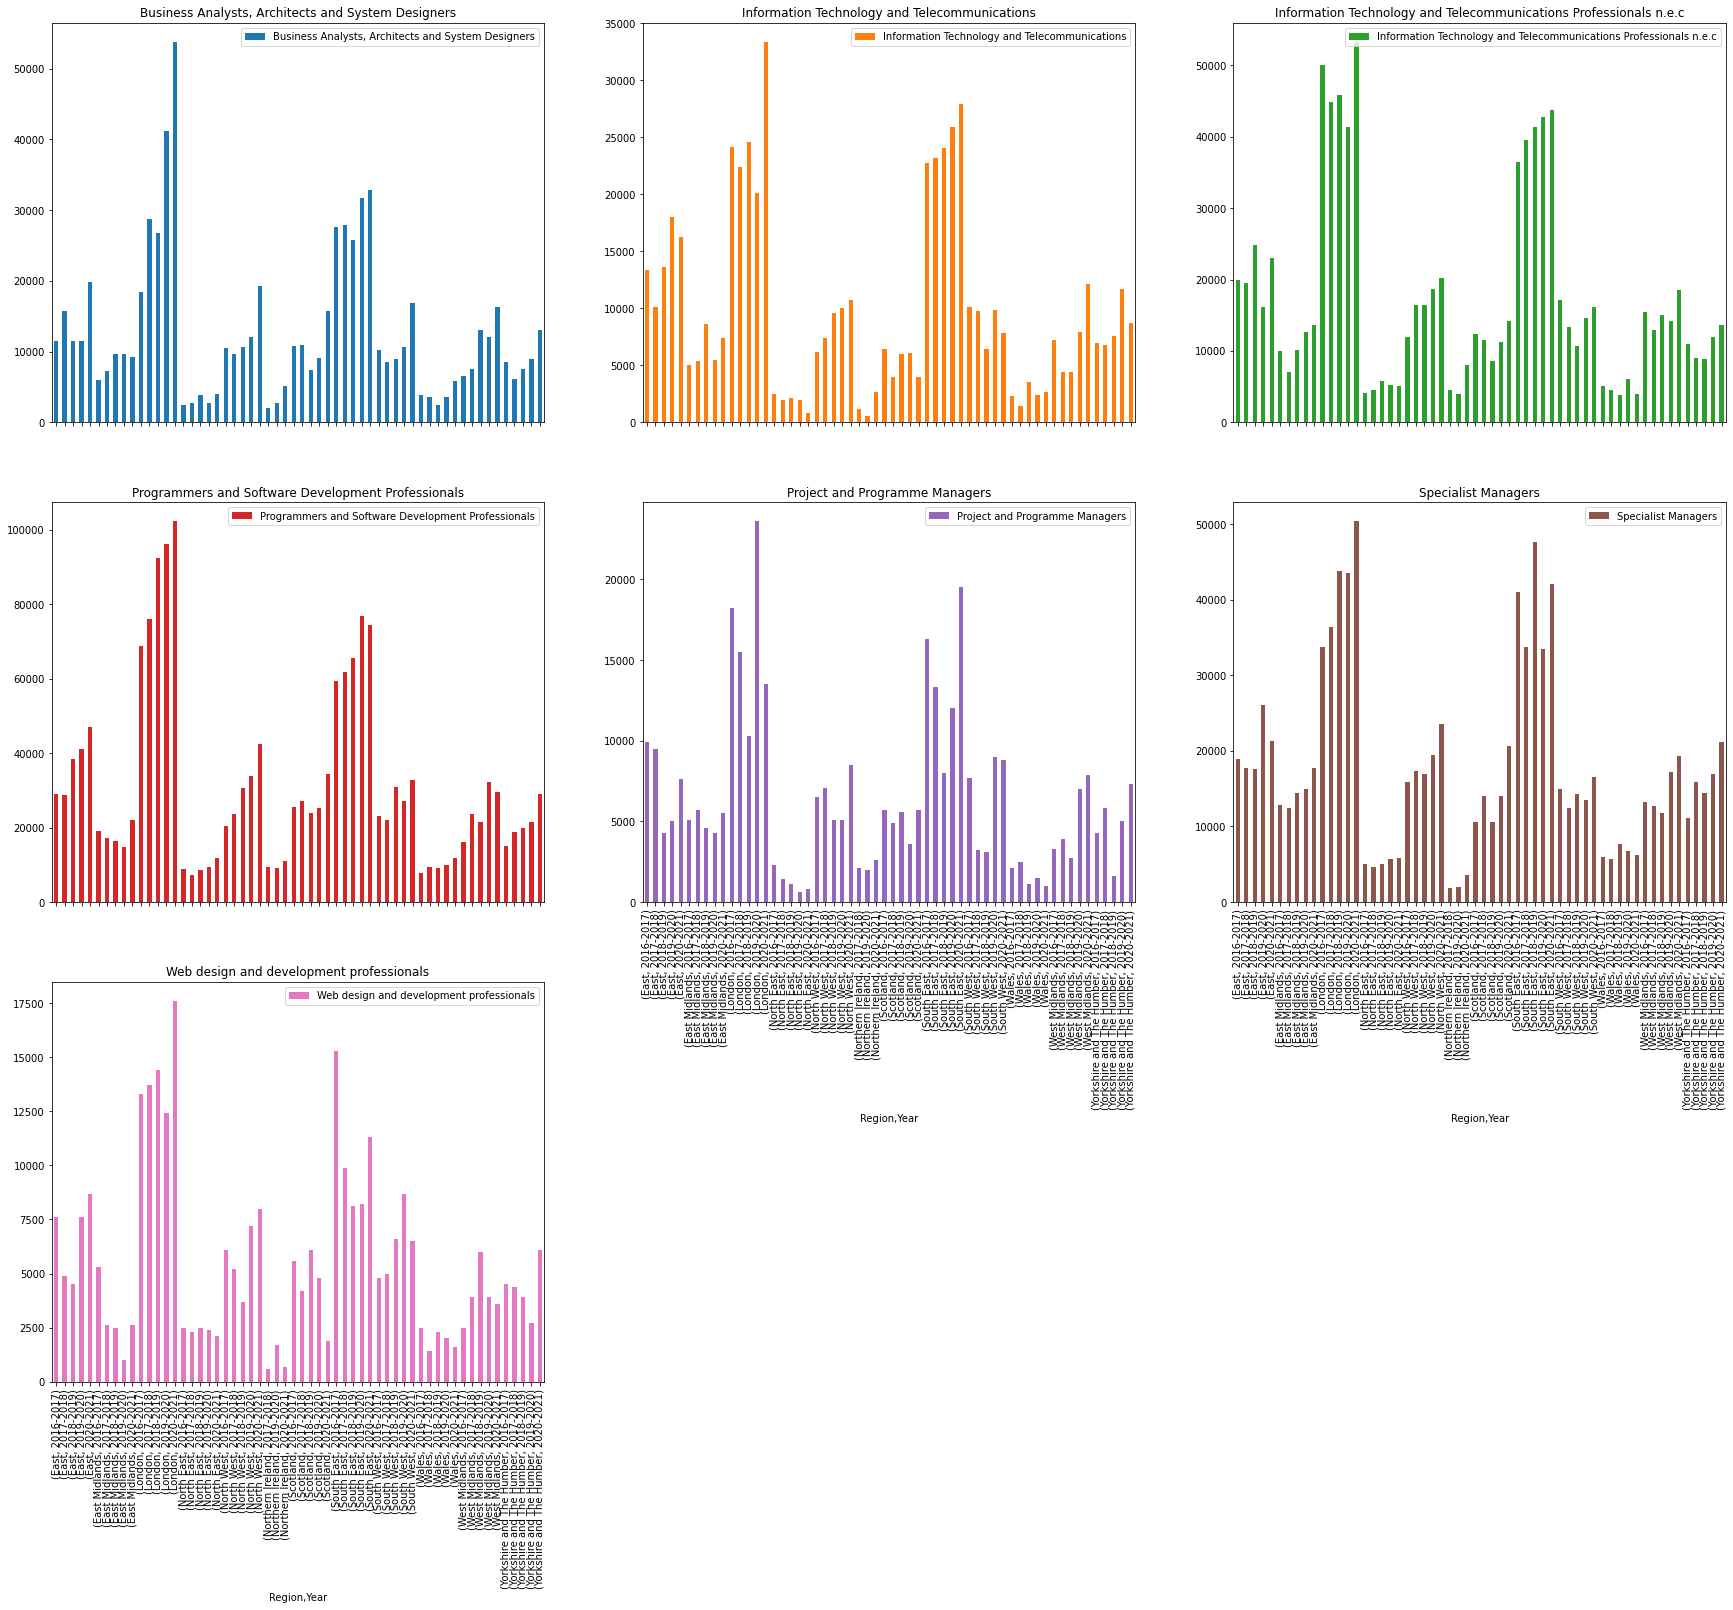

In [11]:
# Easier to interpret than above but still too much data on one graph
# Although not optimal - because all the region and years are on the x-axis so not the best for interpreting

all_persons_copy_pivot[['Business Analysts, Architects and System Designers',
                          'Information Technology and Telecommunications',
            'Information Technology and Telecommunications Professionals n.e.c',
           'Programmers and Software Development Professionals',
           'Project and Programme Managers',
           'Specialist Managers', 'Web design and development professionals']].plot(kind='bar', figsize=(30,25), subplots=True, layout=(3,3))

### Create pivot tables for each sector Indexed by Region, columns = Year

In [12]:
#pivot table for Business Analysts, Architects and System Designers
BA_Arch_SD = all_persons_copy.pivot('Region','Year','Business Analysts, Architects and System Designers')

# view the pivot table
BA_Arch_SD

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,11500.0,15800.0,11500.0,11500.0,19900.0
East Midlands,6000.0,7300.0,9700.0,9600.0,9300.0
London,18400.0,28800.0,26700.0,41200.0,53800.0
North East,2500.0,2800.0,3900.0,2700.0,4000.0
North West,10500.0,9600.0,10600.0,12000.0,19300.0
Northern Ireland,NaN,2000.0,NaN,2700.0,5200.0
Scotland,10800.0,11000.0,7400.0,9100.0,15700.0
South East,27600.0,27900.0,25800.0,31700.0,32800.0
South West,10300.0,8600.0,8900.0,10700.0,16900.0


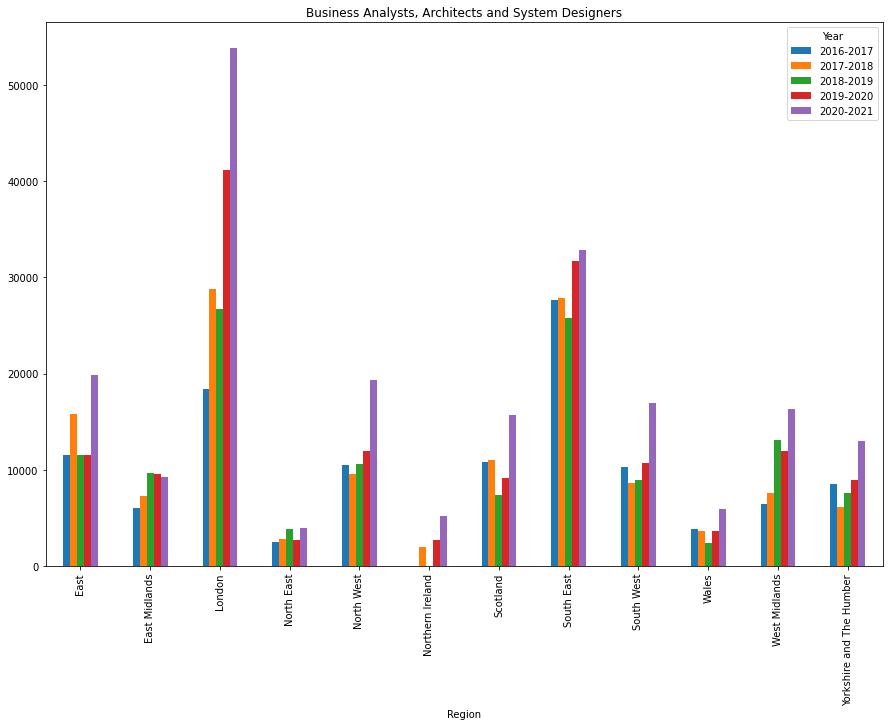

In [13]:
# bar plot based on the pivot table - Business Analysts, Architects and System Designers
ax = BA_Arch_SD.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)
plt.title('Business Analysts, Architects and System Designers')

plt.show()

# comparing across the same grouping of bars

In [14]:
# pivot table for Information Technology and Telecommunications
IT_telcomm = all_persons_copy.pivot('Region','Year','Information Technology and Telecommunications')

# view the pivot table
IT_telcomm

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,13400.0,10100.0,13600.0,18000.0,16300.0
East Midlands,5000.0,5400.0,8600.0,5500.0,7400.0
London,24200.0,22400.0,24600.0,20100.0,33400.0
North East,2500.0,2000.0,2100.0,2000.0,800.0
North West,6200.0,7400.0,9600.0,10000.0,10700.0
Northern Ireland,NaN,1200.0,NaN,600.0,2700.0
Scotland,6400.0,4000.0,6000.0,6100.0,4000.0
South East,22800.0,23200.0,24100.0,25900.0,27900.0
South West,10100.0,9800.0,6400.0,9900.0,7800.0


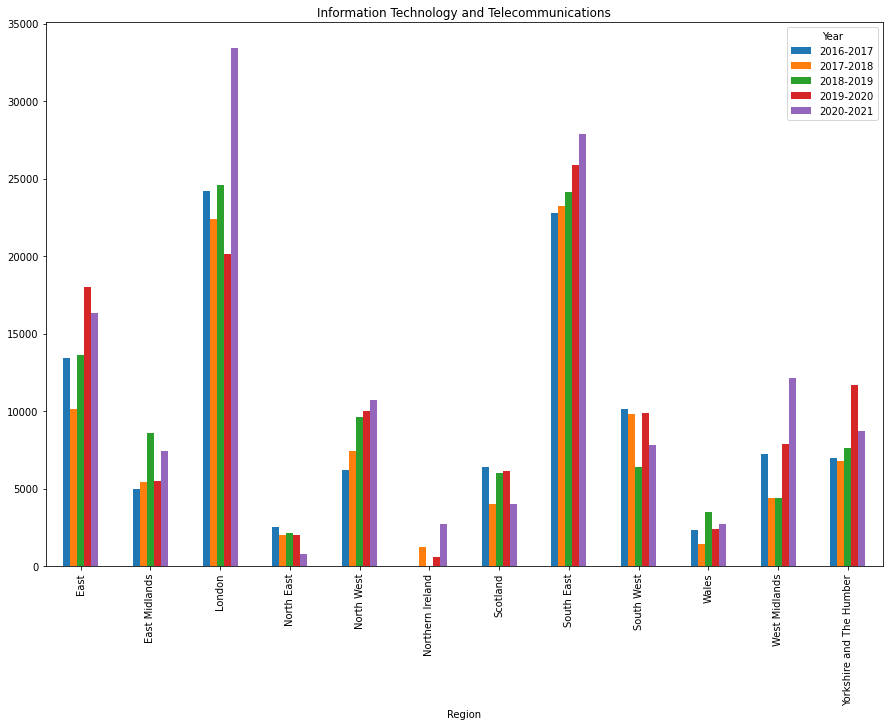

In [15]:
# bar plot based on the pivot table Information Technology and Telecommunications
ax = IT_telcomm.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)
plt.title('Information Technology and Telecommunications')

plt.show()

In [16]:
# pivot table for Information Technology and Telecommunications Professionals n.e.c
IT_telcomm_nec = all_persons_copy.pivot('Region','Year','Information Technology and Telecommunications Professionals n.e.c')

# view the pivot table
IT_telcomm_nec

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,19900.0,19500.0,24800.0,16200.0,23000.0
East Midlands,10000.0,7100.0,10200.0,12600.0,13700.0
London,50100.0,44800.0,45800.0,41400.0,53300.0
North East,4100.0,4600.0,5800.0,5300.0,5100.0
North West,12000.0,16500.0,16500.0,18700.0,20200.0
Northern Ireland,NaN,4500.0,NaN,4000.0,8100.0
Scotland,12400.0,11600.0,8600.0,11300.0,14200.0
South East,36400.0,39600.0,41300.0,42800.0,43700.0
South West,17200.0,13400.0,10700.0,14600.0,16200.0


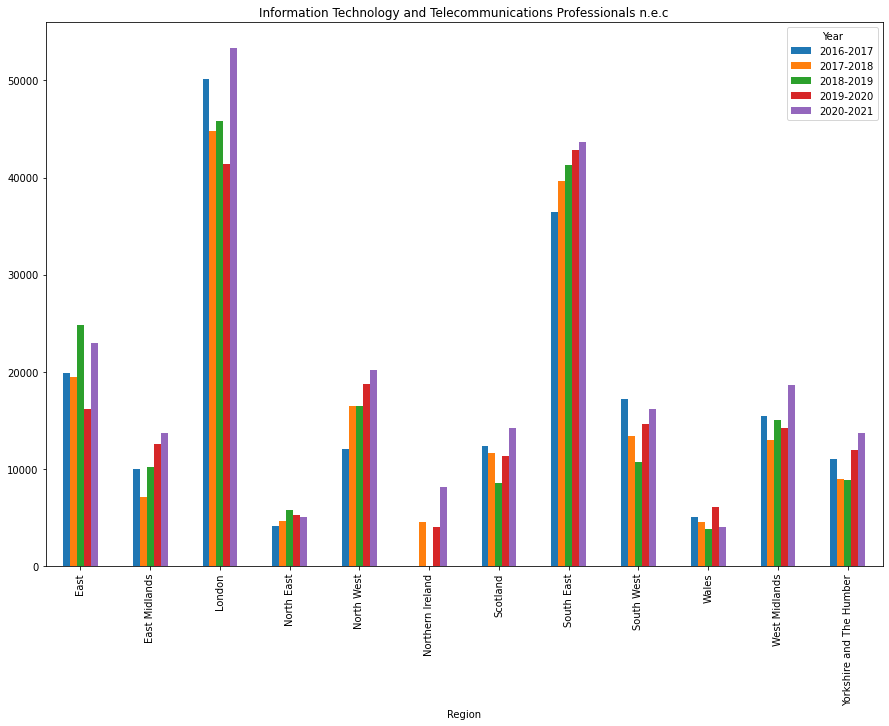

In [17]:
# bar plot based on the pivot table Information Technology and Telecommunications n.e.c
ax = IT_telcomm_nec.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)
plt.title('Information Technology and Telecommunications Professionals n.e.c')

plt.show()

In [18]:
# pivot table for Programmers and Software Development Professionals
Prog_SoftDevProf = all_persons_copy.pivot('Region','Year','Programmers and Software Development Professionals')

# view the pivot table
Prog_SoftDevProf

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,28900.0,28700.0,38500.0,41100.0,47100.0
East Midlands,19000.0,17300.0,16500.0,14700.0,22000.0
London,68900.0,76000.0,92500.0,96300.0,102300.0
North East,8800.0,7300.0,8600.0,9300.0,11800.0
North West,20500.0,23600.0,30600.0,33800.0,42400.0
Northern Ireland,NaN,9400.0,NaN,9200.0,11100.0
Scotland,25600.0,27100.0,23800.0,25300.0,34400.0
South East,59400.0,61900.0,65600.0,77000.0,74400.0
South West,23200.0,22000.0,30800.0,27200.0,32800.0


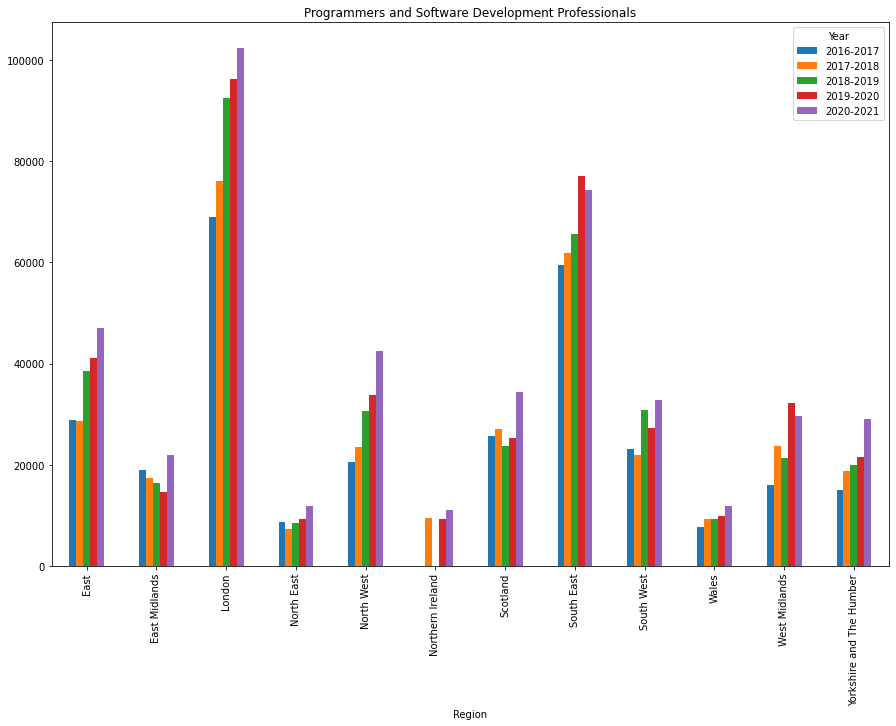

In [19]:
# bar plot based on the pivot table Programmers and Software Development Professionals
ax = Prog_SoftDevProf.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)
plt.title('Programmers and Software Development Professionals')

plt.show()

In [20]:
# pivot table for Project and Programme Managers
Project_ProgManagers = all_persons_copy.pivot('Region','Year','Project and Programme Managers')

# view the pivot table
Project_ProgManagers

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,9900.0,9500.0,4300.0,5000.0,7600.0
East Midlands,5100.0,5700.0,4600.0,4300.0,5500.0
London,18200.0,15500.0,10300.0,23600.0,13500.0
North East,2300.0,1400.0,1100.0,600.0,800.0
North West,6500.0,7100.0,5100.0,5100.0,8500.0
Northern Ireland,NaN,2100.0,NaN,2000.0,2600.0
Scotland,5700.0,4900.0,5600.0,3600.0,5700.0
South East,16300.0,13300.0,8000.0,12000.0,19500.0
South West,7700.0,3200.0,3100.0,9000.0,8800.0


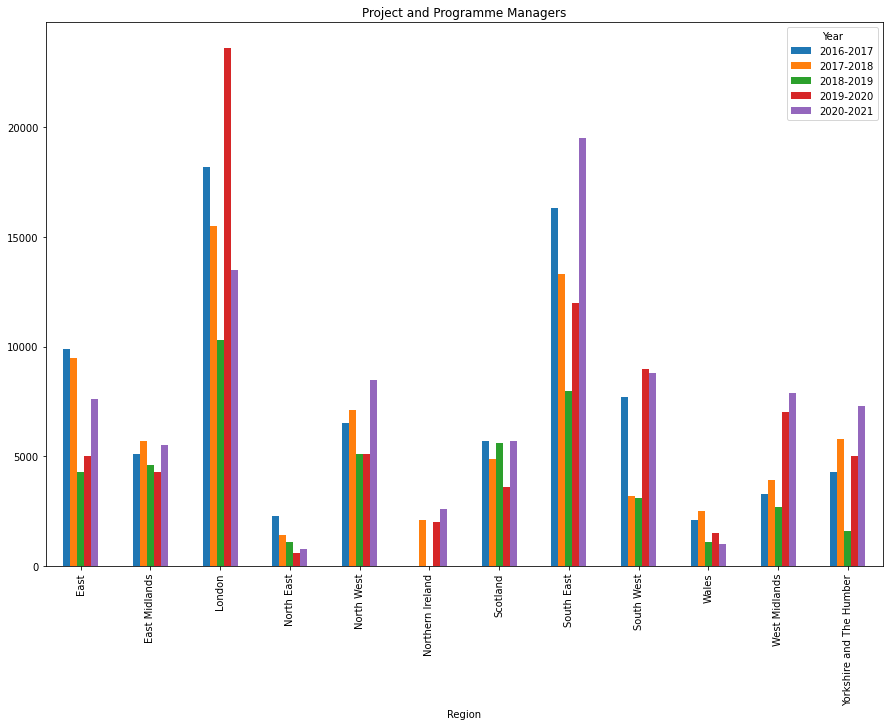

In [21]:
# bar plot based on the pivot table Project and Programme Managers
ax = Project_ProgManagers.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)
plt.title('Project and Programme Managers')

plt.show()

In [22]:
# pivot table for Specialist Managers
Specialist_Managers = all_persons_copy.pivot('Region','Year','Specialist Managers')

# view the pivot table
Specialist_Managers

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,18900.0,17800.0,17600.0,26100.0,21300.0
East Midlands,12800.0,12500.0,14400.0,14900.0,17800.0
London,33700.0,36400.0,43800.0,43600.0,50400.0
North East,5100.0,4600.0,5100.0,5700.0,5800.0
North West,15900.0,17300.0,17000.0,19400.0,23600.0
Northern Ireland,NaN,1800.0,NaN,2000.0,3600.0
Scotland,10600.0,14000.0,10600.0,14000.0,20700.0
South East,41000.0,33800.0,47700.0,33500.0,42100.0
South West,15000.0,12500.0,14300.0,13500.0,16600.0


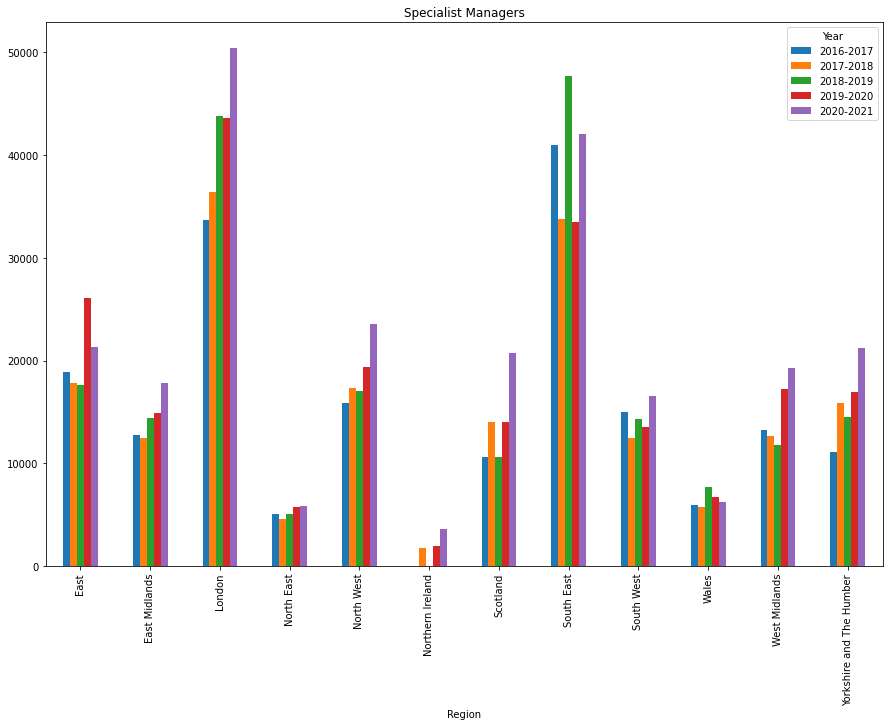

In [23]:
# bar plot based on the pivot table Specialist Managers
ax = Specialist_Managers.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)
plt.title('Specialist Managers')

plt.show()

In [24]:
# pivot table for Web design and development professionals 
Web_design_dev_prof = all_persons_copy.pivot('Region','Year','Web design and development professionals')

# view the pivot table
Web_design_dev_prof

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,7600.0,4900.0,4500.0,7600.0,8700.0
East Midlands,5300.0,2600.0,2500.0,1000.0,2600.0
London,13300.0,13700.0,14400.0,12400.0,17600.0
North East,2500.0,2300.0,2500.0,2400.0,2100.0
North West,6100.0,5200.0,3700.0,7200.0,8000.0
Northern Ireland,NaN,600.0,NaN,1700.0,700.0
Scotland,5600.0,4200.0,6100.0,4800.0,1900.0
South East,15300.0,9900.0,8100.0,8200.0,11300.0
South West,4800.0,5000.0,6600.0,8700.0,6500.0


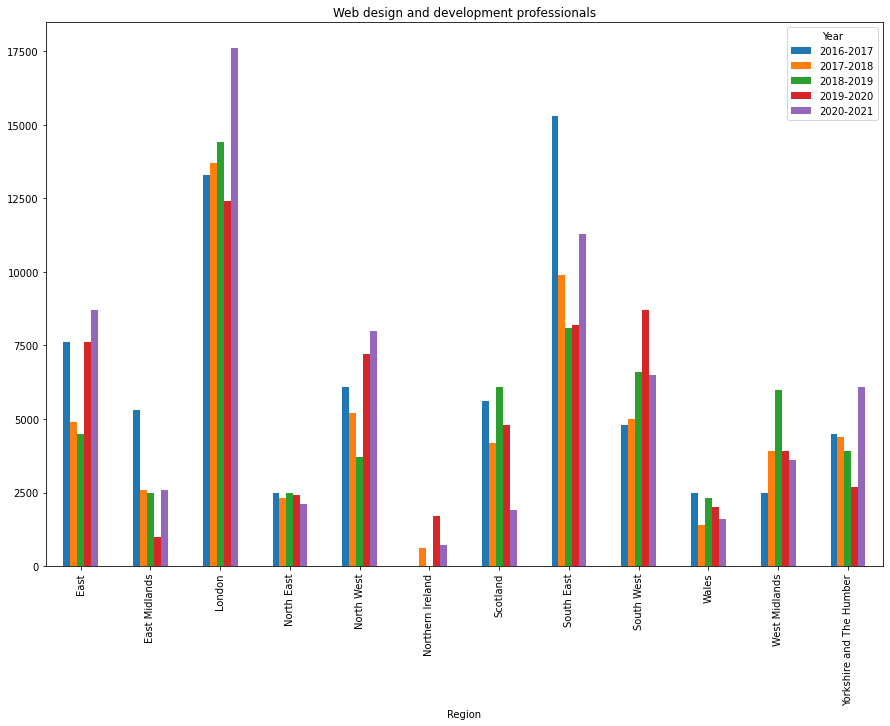

In [25]:
# bar plot based on the pivot table Web design and development professionals
ax = Web_design_dev_prof.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)
plt.title('Web design and development professionals')

plt.show()

### Analysis on Males and Females Datasets

In [26]:
# read in datasets for females and males 
females = pd.read_csv('Occupation_Gender_Females_16_21.csv')
males = pd.read_csv('Occupation_Gender_Males_16_21.csv')

### Copy the databases

In [28]:
# copy females data set and print the first 5 rows
females_copy = females.copy()
females_copy.head()

,Region,Year,Information Technology and Telecommunications,Specialist Managers,Project and Programme Managers,"Business Analysts, Architects and System Designers",Programmers and Software Development Professionals,Web design and development professionals,Information Technology and Telecommunications Professionals n.e.c
0,East,2016-2017,1600,3100,3300,2600,3800,2000,2300
1,East,2017-2018,700,4100,2200,2100,4900,1100,2600
2,East,2018-2019,1300,2500,1500,2000,5700,1000,3200
3,East,2019-2020,900,5100,1300,2200,2300,1400,4000
4,East,2020-2021,1100,7300,2100,5500,6000,1400,3400


In [29]:
# copy males data set and print the first 5 rows
males_copy = males.copy()
males_copy.head()

,Region,Year,Information Technology and Telecommunications,Specialist Managers,Project and Programme Managers,"Business Analysts, Architects and System Designers",Programmers and Software Development Professionals,Web design and development professionals,Information Technology and Telecommunications Professionals n.e.c
0,East,2016-2017,11800,15800,6600,8900,25100,5600,17600
1,East,2017-2018,9400,13700,7300,13700,23800,3800,16900
2,East,2018-2019,12300,15100,2800,9500,32800,3500,21600
3,East,2019-2020,17100,21000,3700,9300,38800,6200,12200
4,East,2020-2021,15200,14000,5500,14400,41100,7300,19600


In [30]:
# Both Data sets ahve integer or object(string) values
# We can see that 2 columns has categorical data and all the other columns are of a numeric type (int 64) with non-Null entries.

females_copy.info()

males_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Region                                                             60 non-null     object
 1   Year                                                               60 non-null     object
 2   Information Technology and Telecommunications                      60 non-null     int64 
 3   Specialist Managers                                                60 non-null     int64 
 4   Project and Programme Managers                                     60 non-null     int64 
 5   Business Analysts, Architects and System Designers                 60 non-null     int64 
 6   Programmers and Software Development Professionals                 60 non-null     int64 
 7   Web design and development professiona

In [31]:
# Both datasets consist of 60 rows and 9 columns
print(females_copy.shape)

print(males_copy.shape)

(60, 9)
(60, 9)


In [32]:
# check labels for each column for all data sets

print('females', females_copy.columns.values)

print('males', males_copy.columns.values)

females ['Region' 'Year' 'Information Technology and Telecommunications'
 'Specialist Managers' 'Project and Programme Managers'
 'Business Analysts, Architects and System Designers'
 'Programmers and Software Development Professionals'
 'Web design and development professionals'
 'Information Technology and Telecommunications Professionals n.e.c']
males ['Region' 'Year' 'Information Technology and Telecommunications'
 'Specialist Managers' 'Project and Programme Managers'
 'Business Analysts, Architects and System Designers'
 'Programmers and Software Development Professionals'
 'Web design and development professionals'
 'Information Technology and Telecommunications Professionals n.e.c']


In [33]:
### Describe the datasets to get a statistical summary of the females datasets 

females_copy.head(10)

females_copy.describe()

,Information Technology and Telecommunications,Specialist Managers,Project and Programme Managers,"Business Analysts, Architects and System Designers",Programmers and Software Development Professionals,Web design and development professionals,Information Technology and Telecommunications Professionals n.e.c
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1170.000000,3551.666667,1731.666667,2133.333333,4186.666667,1443.333333,3135.000000
std,1043.023636,2733.873620,1541.459980,2015.000245,3835.139344,1604.692976,3178.680304
min,0.000000,100.000000,0.000000,200.000000,300.000000,0.000000,0.000000
25%,475.000000,1775.000000,775.000000,875.000000,1400.000000,400.000000,1300.000000
50%,850.000000,3050.000000,1300.000000,1850.000000,2950.000000,950.000000,2350.000000
75%,1625.000000,4300.000000,2200.000000,2425.000000,5025.000000,1650.000000,3400.000000
max,4500.000000,14800.000000,6400.000000,11900.000000,17200.000000,8100.000000,16500.000000


In [34]:
### Describe the datasets to get a statistical summary of the males dataset 

males_copy.head(10)

males_copy.describe()

,Information Technology and Telecommunications,Specialist Managers,Project and Programme Managers,"Business Analysts, Architects and System Designers",Programmers and Software Development Professionals,Web design and development professionals,Information Technology and Telecommunications Professionals n.e.c
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,8366.666667,13783.333333,4525.000000,10318.333333,26380.000000,3941.666667,13758.333333
std,7147.351451,9756.200404,3610.231459,8510.541652,20281.709218,2598.388788,10687.649956
min,0.000000,1600.000000,0.000000,1300.000000,5300.000000,0.000000,2600.000000
25%,2925.000000,6800.000000,2100.000000,4500.000000,12250.000000,1900.000000,6100.000000
50%,6300.000000,11500.000000,3500.000000,8100.000000,20150.000000,3500.000000,10750.000000
75%,10925.000000,15650.000000,6600.000000,13325.000000,28800.000000,5525.000000,15025.000000
max,28900.000000,39800.000000,18300.000000,41900.000000,85100.000000,10700.000000,41600.000000


In [35]:
# drop '0' values for females

females_copy = females_copy.loc[
    (females_copy['Information Technology and Telecommunications'] != 0) & 
                     (females_copy['Web design and development professionals'] != 0) 
    & (females_copy['Project and Programme Managers'] !=0 ) 
    & (females_copy['Information Technology and Telecommunications Professionals n.e.c'] != 0)]

# check the rows & cols
females_copy.shape

(49, 9)

In [36]:
# drop '0' values for males

males_copy = males_copy.loc[
    (males_copy['Information Technology and Telecommunications'] != 0) & 
                     (males_copy['Web design and development professionals'] != 0) 
    & (males_copy['Project and Programme Managers'] !=0 )]

# check the rows & cols
males_copy.shape

(56, 9)

In [37]:
females_copy.describe()

males_copy.describe()

,Information Technology and Telecommunications,Specialist Managers,Project and Programme Managers,"Business Analysts, Architects and System Designers",Programmers and Software Development Professionals,Web design and development professionals,Information Technology and Telecommunications Professionals n.e.c
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,8882.142857,14548.214286,4757.142857,10869.642857,27707.142857,4182.142857,14458.928571
std,7119.936341,9649.907980,3621.393862,8542.171741,20345.621438,2516.571054,10719.121008
min,600.000000,1600.000000,600.000000,1300.000000,6800.000000,600.000000,2600.000000
25%,3800.000000,8850.000000,2350.000000,5350.000000,14650.000000,2100.000000,8350.000000
50%,6500.000000,12250.000000,3650.000000,8500.000000,20650.000000,3650.000000,11150.000000
75%,11200.000000,15950.000000,6625.000000,13725.000000,31375.000000,5725.000000,17050.000000
max,28900.000000,39800.000000,18300.000000,41900.000000,85100.000000,10700.000000,41600.000000


<p>
    
Observation between Males and Females dataset

All statistical values for the males datasest is considerbly higher than that of the females dataset. 

The mean is higher compared to median for females and males

The difference between 75% and max higher for males and females

Overall there are consideraly more males than females in various roles in the field of Technology across these sectors
    

</p>

# Plotting Graphs

### Females: Create pivot tables for each sector Index = Region, Columns = Year  & plot graphs

In [38]:
#pivot table for Business Analysts, Architects and System Designers
BA_Arch_SD = females_copy.pivot('Region','Year','Business Analysts, Architects and System Designers')

# view the pivot table
BA_Arch_SD

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,2600.0,2100.0,2000.0,2200.0,5500.0
East Midlands,1400.0,NaN,2100.0,NaN,1300.0
London,2500.0,2000.0,4600.0,7600.0,11900.0
North East,600.0,700.0,NaN,NaN,NaN
North West,2100.0,1500.0,1000.0,1900.0,3300.0
Northern Ireland,NaN,NaN,NaN,NaN,1000.0
Scotland,3700.0,2000.0,2400.0,2300.0,1900.0
South East,3700.0,5600.0,3000.0,4100.0,6200.0
South West,1400.0,1900.0,1500.0,1000.0,2200.0


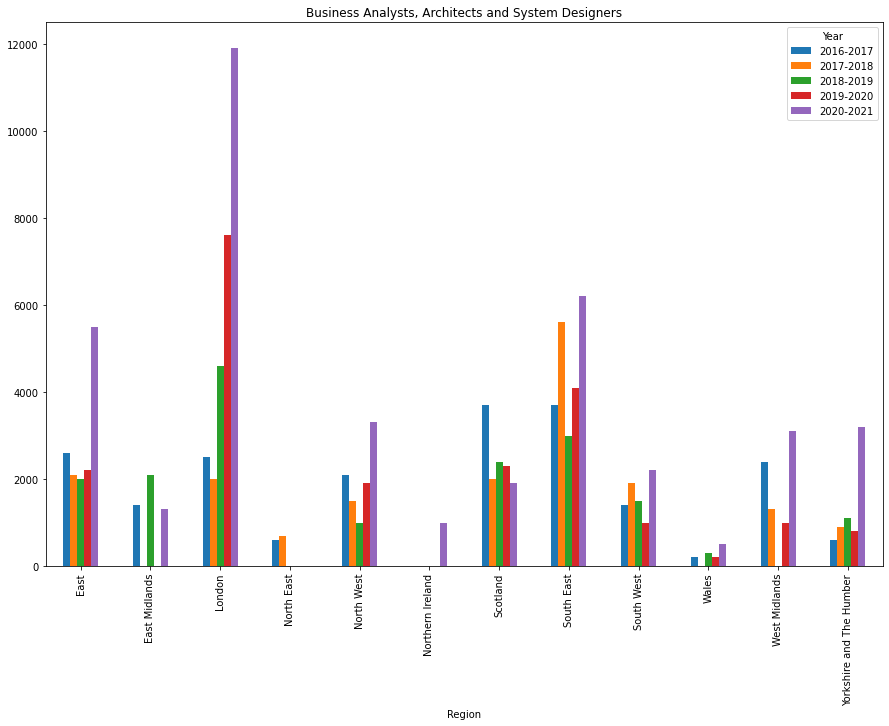

In [39]:
# bar plot based on the pivot table - Business Analysts, Architects and System Designers
ax = BA_Arch_SD.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Business Analysts, Architects and System Designers')

plt.show()

# comparing across the same grouping of bars

In [40]:
# pivot table for Information Technology and Telecommunications
IT_telcomm = females_copy.pivot('Region','Year','Information Technology and Telecommunications')

# view the pivot table
IT_telcomm

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,1600.0,700.0,1300.0,900.0,1100.0
East Midlands,1200.0,NaN,2400.0,NaN,1000.0
London,1900.0,3600.0,3500.0,3500.0,4500.0
North East,200.0,400.0,NaN,NaN,NaN
North West,600.0,900.0,1900.0,200.0,1800.0
Northern Ireland,NaN,NaN,NaN,NaN,600.0
Scotland,1500.0,1300.0,800.0,1100.0,200.0
South East,2400.0,2100.0,1700.0,3600.0,3100.0
South West,1200.0,700.0,600.0,1500.0,800.0


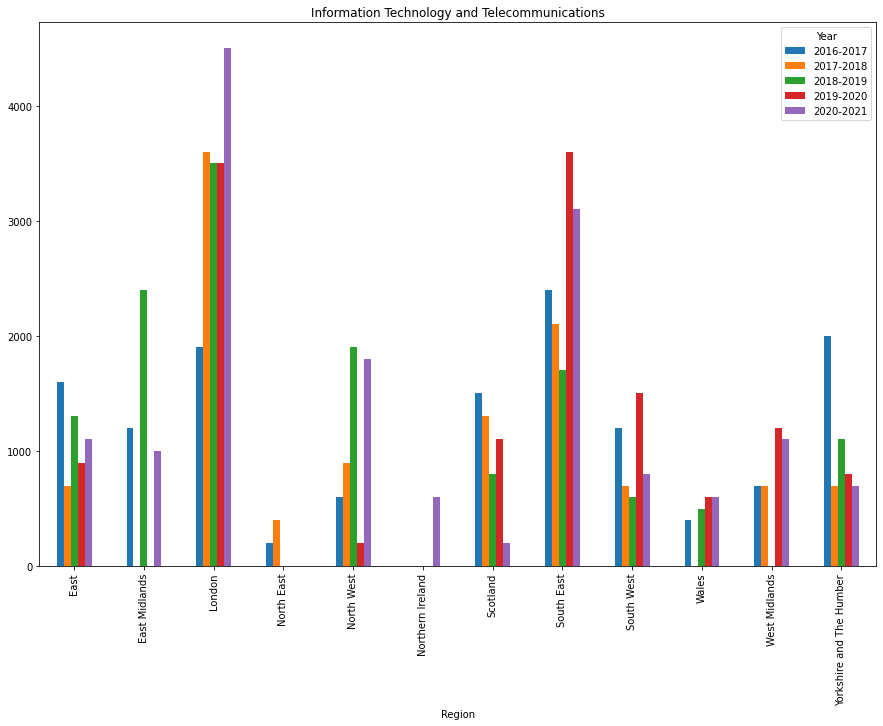

In [41]:
# bar plot based on the pivot table Information Technology and Telecommunications
ax = IT_telcomm.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Information Technology and Telecommunications')

plt.show()

In [42]:
# pivot table for Information Technology and Telecommunications Professionals n.e.c
IT_telcomm_nec = females_copy.pivot('Region','Year','Information Technology and Telecommunications Professionals n.e.c')

# view the pivot table
IT_telcomm_nec

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,2300.0,2600.0,3200.0,4000.0,3400.0
East Midlands,400.0,NaN,1700.0,NaN,3400.0
London,8500.0,9100.0,7800.0,14100.0,16500.0
North East,400.0,400.0,NaN,NaN,NaN
North West,2400.0,3300.0,3000.0,5900.0,2700.0
Northern Ireland,NaN,NaN,NaN,NaN,1800.0
Scotland,1800.0,3000.0,700.0,2400.0,4300.0
South East,3700.0,5400.0,5300.0,6400.0,10300.0
South West,2800.0,2200.0,1300.0,2000.0,2700.0


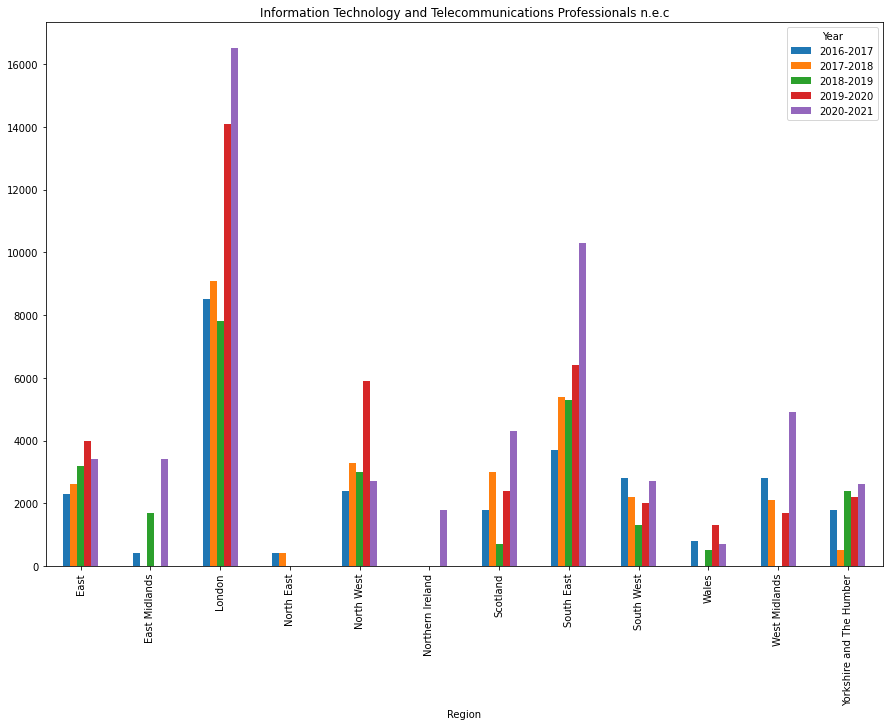

In [43]:
# bar plot based on the pivot table Information Technology and Telecommunications n.e.c
ax = IT_telcomm_nec.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Information Technology and Telecommunications Professionals n.e.c')

plt.show()

In [44]:
# pivot table for Programmers and Software Development Professionals
Prog_SoftDevProf = females_copy.pivot('Region','Year','Programmers and Software Development Professionals')

# view the pivot table
Prog_SoftDevProf

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,3800.0,4900.0,5700.0,2300.0,6000.0
East Midlands,3700.0,NaN,2000.0,NaN,3100.0
London,7600.0,10700.0,12900.0,14700.0,17200.0
North East,600.0,400.0,NaN,NaN,NaN
North West,2900.0,4200.0,5000.0,2900.0,4200.0
Northern Ireland,NaN,NaN,NaN,NaN,1000.0
Scotland,3300.0,5100.0,4900.0,4700.0,6300.0
South East,11100.0,7400.0,8900.0,10900.0,13600.0
South West,3100.0,1800.0,3500.0,2300.0,5900.0


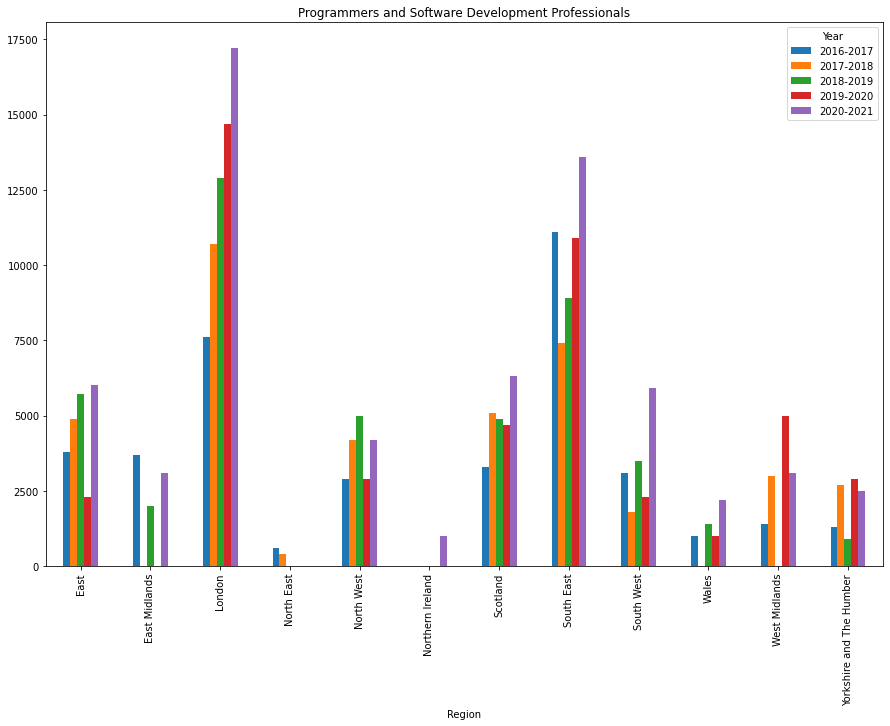

In [45]:
# bar plot based on the pivot table Programmers and Software Development Professionals
ax = Prog_SoftDevProf.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Programmers and Software Development Professionals')

plt.show()

In [46]:
# pivot table for Project and Programme Managers
Project_ProgManagers = females_copy.pivot('Region','Year','Project and Programme Managers')

# view the pivot table
Project_ProgManagers

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,3300.0,2200.0,1500.0,1300.0,2100.0
East Midlands,900.0,NaN,1700.0,NaN,1800.0
London,6400.0,6000.0,2400.0,5300.0,6400.0
North East,600.0,300.0,NaN,NaN,NaN
North West,900.0,2000.0,2100.0,1500.0,1700.0
Northern Ireland,NaN,NaN,NaN,NaN,500.0
Scotland,1500.0,1900.0,1300.0,1100.0,2900.0
South East,4200.0,4300.0,1300.0,2800.0,4300.0
South West,1100.0,800.0,900.0,1400.0,2200.0


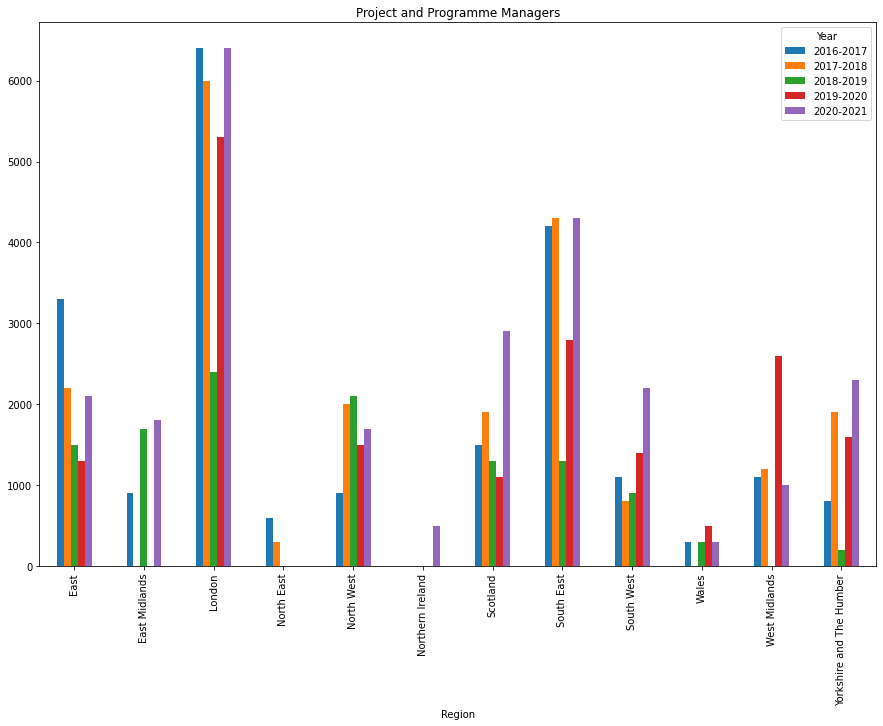

In [47]:
# bar plot based on the pivot table Project and Programme Managers
ax = Project_ProgManagers.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Project and Programme Managers')

plt.show()

In [48]:
# pivot table for Specialist Managers
Specialist_Managers = females_copy.pivot('Region','Year','Specialist Managers')

# view the pivot table
Specialist_Managers

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,3100.0,4100.0,2500.0,5100.0,7300.0
East Midlands,1900.0,NaN,4100.0,NaN,3700.0
London,7100.0,7100.0,6700.0,11300.0,14800.0
North East,1000.0,1700.0,NaN,NaN,NaN
North West,3200.0,3700.0,3900.0,3900.0,6600.0
Northern Ireland,NaN,NaN,NaN,NaN,400.0
Scotland,2200.0,3900.0,1600.0,2500.0,4300.0
South East,5200.0,4300.0,7900.0,7100.0,8000.0
South West,2700.0,2100.0,2800.0,3600.0,4000.0


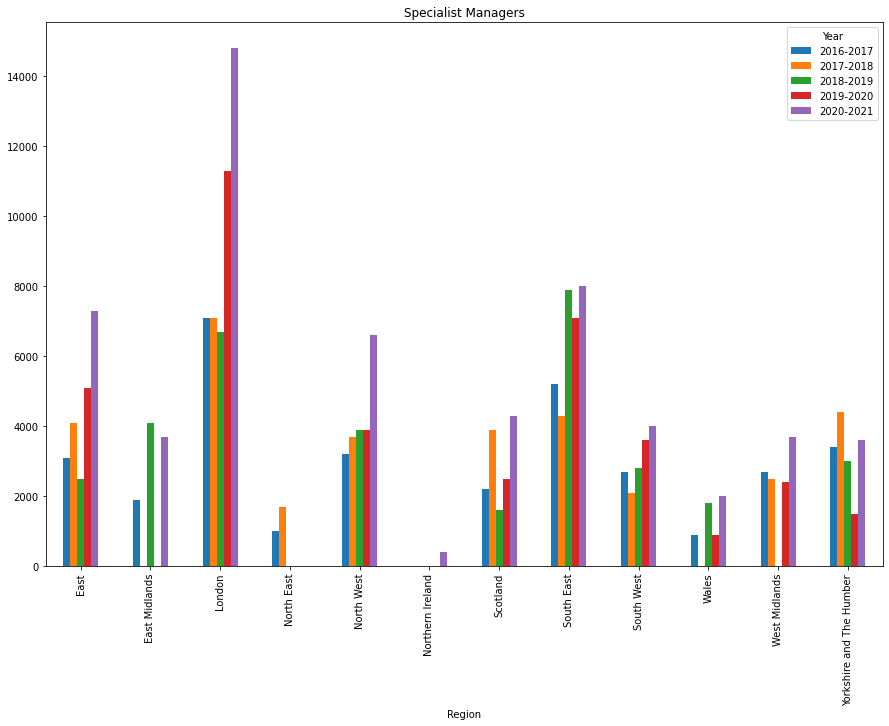

In [49]:
# bar plot based on the pivot table Specialist Managers
ax = Specialist_Managers.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Specialist Managers')

plt.show()

In [50]:
# pivot table for Web design and development professionals 
Web_design_dev_prof = females_copy.pivot('Region','Year','Web design and development professionals')

# view the pivot table
Web_design_dev_prof

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,2000.0,1100.0,1000.0,1400.0,1400.0
East Midlands,1300.0,NaN,700.0,NaN,700.0
London,4700.0,5900.0,6100.0,2700.0,8100.0
North East,400.0,400.0,NaN,NaN,NaN
North West,800.0,500.0,1000.0,800.0,1900.0
Northern Ireland,NaN,NaN,NaN,NaN,700.0
Scotland,2500.0,1300.0,1600.0,1600.0,100.0
South East,4600.0,3200.0,2000.0,2700.0,3000.0
South West,1300.0,1200.0,1500.0,700.0,2500.0


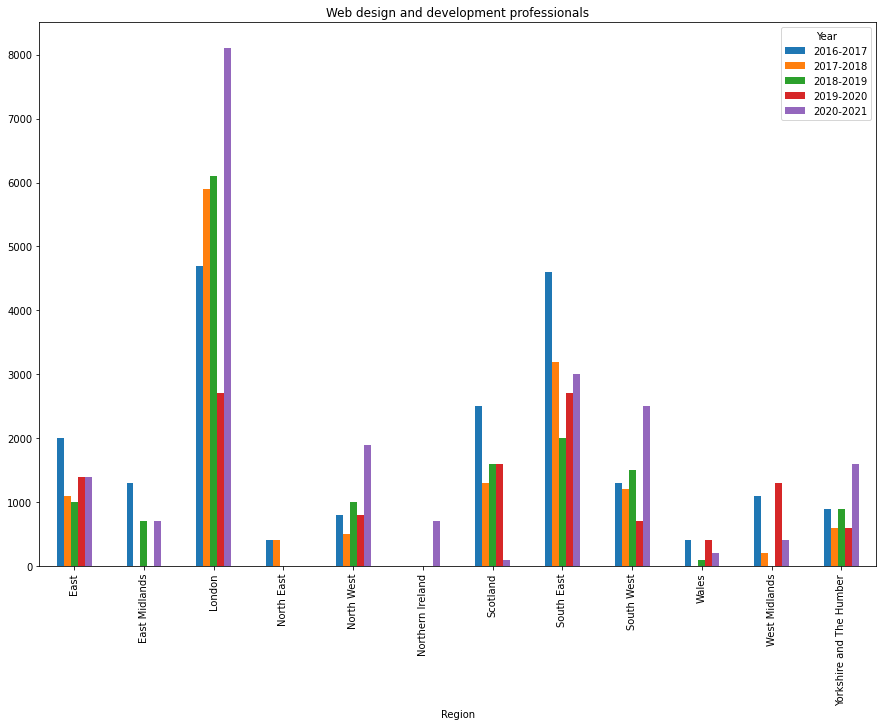

In [51]:
# bar plot based on the pivot table Web design and development professionals
ax = Web_design_dev_prof.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Web design and development professionals')

plt.show()

### Males:  Create pivot tables for each sector Index = Region, Columns = Year & plot graphs

In [52]:
#pivot table for Business Analysts, Architects and System Designers
BA_Arch_SD_2 = males_copy.pivot('Region','Year','Business Analysts, Architects and System Designers')

# view the pivot table
BA_Arch_SD_2

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,8900.0,13700.0,9500.0,9300.0,14400.0
East Midlands,4600.0,5500.0,7600.0,8600.0,8000.0
London,15900.0,26800.0,22100.0,33600.0,41900.0
North East,1900.0,2100.0,3200.0,2400.0,NaN
North West,8400.0,8100.0,9600.0,10100.0,16000.0
Northern Ireland,NaN,1300.0,NaN,2200.0,NaN
Scotland,7100.0,9000.0,5000.0,6800.0,13800.0
South East,23900.0,22300.0,22800.0,27600.0,26600.0
South West,8900.0,6700.0,7400.0,9700.0,14700.0


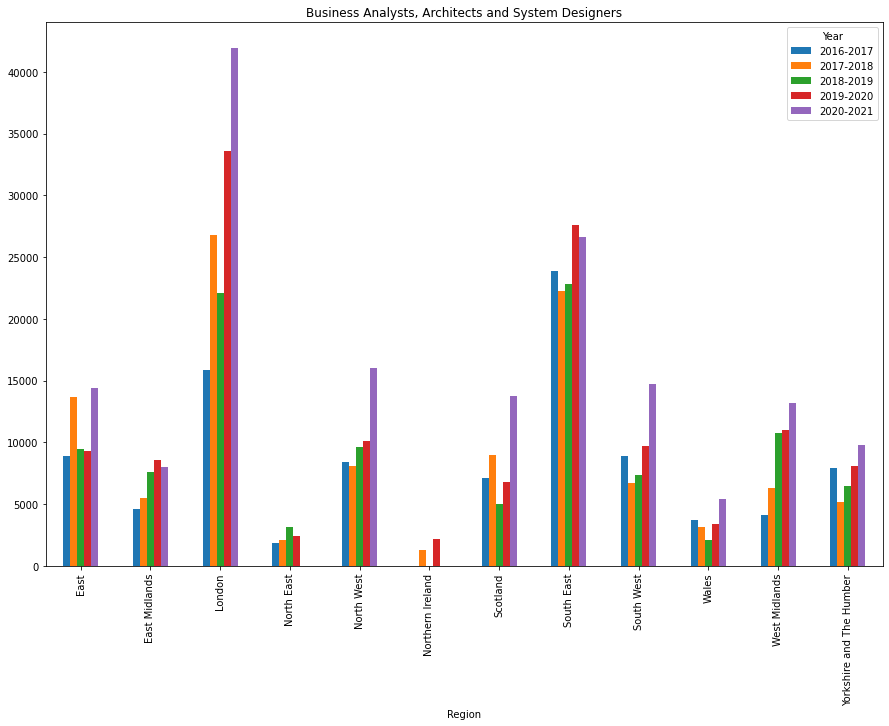

In [53]:
# bar plot based on the pivot table - Business Analysts, Architects and System Designers
ax = BA_Arch_SD_2.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Business Analysts, Architects and System Designers')

plt.show()

In [54]:
# pivot table for Information Technology and Telecommunications
IT_telcomm_2 = males_copy.pivot('Region','Year','Information Technology and Telecommunications')

# view the pivot table
IT_telcomm_2

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,11800.0,9400.0,12300.0,17100.0,15200.0
East Midlands,3800.0,5000.0,6200.0,3800.0,6400.0
London,22300.0,18800.0,21100.0,16600.0,28900.0
North East,2300.0,1600.0,1800.0,1900.0,NaN
North West,5600.0,6500.0,7700.0,9800.0,8900.0
Northern Ireland,NaN,1200.0,NaN,600.0,NaN
Scotland,4900.0,2700.0,5200.0,5000.0,3800.0
South East,20400.0,21100.0,22400.0,22300.0,24800.0
South West,8900.0,9100.0,5800.0,8400.0,7000.0


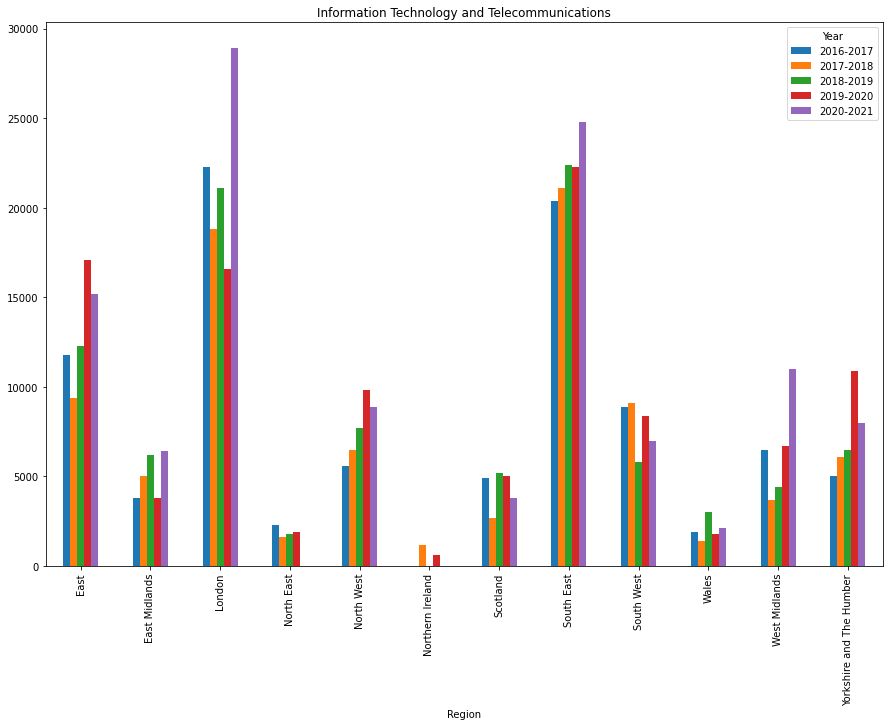

In [55]:
# bar plot based on the pivot table Information Technology and Telecommunications
ax = IT_telcomm_2.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Information Technology and Telecommunications')

plt.show()

In [56]:
# pivot table for Information Technology and Telecommunications Professionals n.e.c
IT_telcomm_nec_2 = males_copy.pivot('Region','Year','Information Technology and Telecommunications Professionals n.e.c')

# view the pivot table
IT_telcomm_nec_2

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,17600.0,16900.0,21600.0,12200.0,19600.0
East Midlands,9600.0,5500.0,8500.0,11300.0,10300.0
London,41600.0,35700.0,38000.0,27300.0,36800.0
North East,3700.0,4200.0,4900.0,5000.0,NaN
North West,9600.0,13200.0,13500.0,12800.0,17500.0
Northern Ireland,NaN,4500.0,NaN,2600.0,NaN
Scotland,10600.0,8600.0,7900.0,8900.0,9900.0
South East,32700.0,34200.0,36000.0,36400.0,33400.0
South West,14400.0,11200.0,9400.0,12600.0,13500.0


In [57]:
# pivot table for Programmers and Software Development Professionals
Prog_SoftDevProf_2 = males_copy.pivot('Region','Year','Programmers and Software Development Professionals')

# view the pivot table
Prog_SoftDevProf_2

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,25100.0,23800.0,32800.0,38800.0,41100.0
East Midlands,15300.0,14700.0,14500.0,12900.0,18900.0
London,61300.0,65300.0,79600.0,81600.0,85100.0
North East,8200.0,6900.0,8000.0,8300.0,NaN
North West,17600.0,19400.0,25600.0,30900.0,38200.0
Northern Ireland,NaN,8300.0,NaN,7800.0,NaN
Scotland,22300.0,22000.0,18900.0,20600.0,28100.0
South East,48300.0,54500.0,56700.0,66100.0,60800.0
South West,20100.0,20200.0,27300.0,24900.0,26900.0


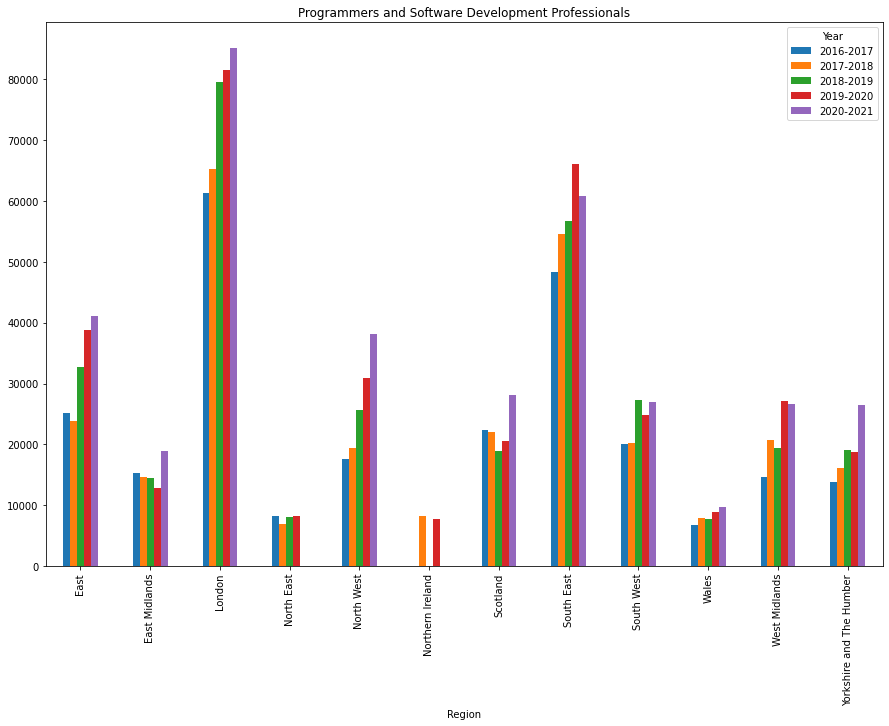

In [58]:
# bar plot based on the pivot table Programmers and Software Development Professionals
ax = Prog_SoftDevProf_2.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Programmers and Software Development Professionals')

plt.show()

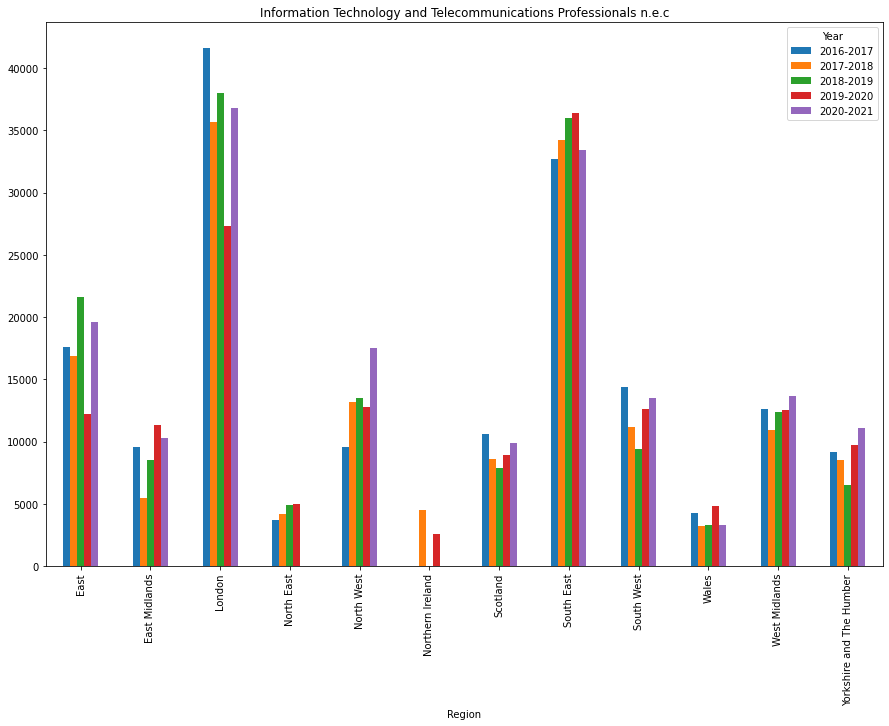

In [59]:
# bar plot based on the pivot table Information Technology and Telecommunications
ax = IT_telcomm_nec_2.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Information Technology and Telecommunications Professionals n.e.c')

plt.show()

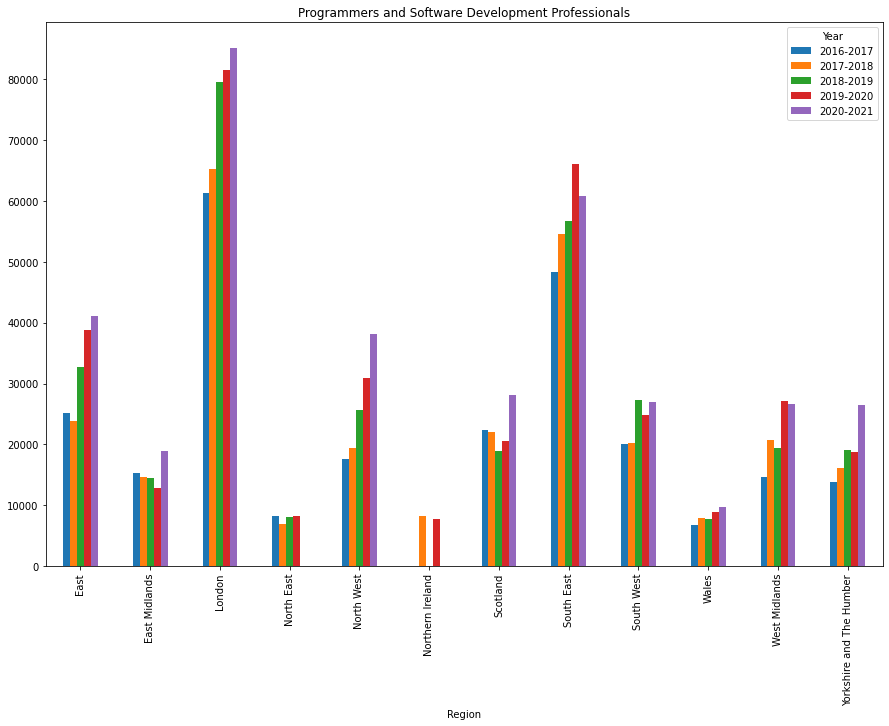

In [60]:
# bar plot based on the pivot table Programmers and Software Development Professionals
ax = Prog_SoftDevProf_2.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Programmers and Software Development Professionals')

plt.show()

In [61]:
# pivot table for Project and Programme Managers
Project_ProgManagers_2 = males_copy.pivot('Region','Year','Project and Programme Managers')

# view the pivot table
Project_ProgManagers_2

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,6600.0,7300.0,2800.0,3700.0,5500.0
East Midlands,4200.0,3400.0,2900.0,3500.0,3700.0
London,11800.0,9500.0,7900.0,18300.0,7100.0
North East,1700.0,1100.0,1100.0,600.0,NaN
North West,5600.0,5100.0,3000.0,3600.0,6800.0
Northern Ireland,NaN,1200.0,NaN,1800.0,NaN
Scotland,4200.0,3000.0,4300.0,2500.0,2800.0
South East,12100.0,9000.0,6700.0,9200.0,15200.0
South West,6600.0,2400.0,2200.0,7600.0,6600.0


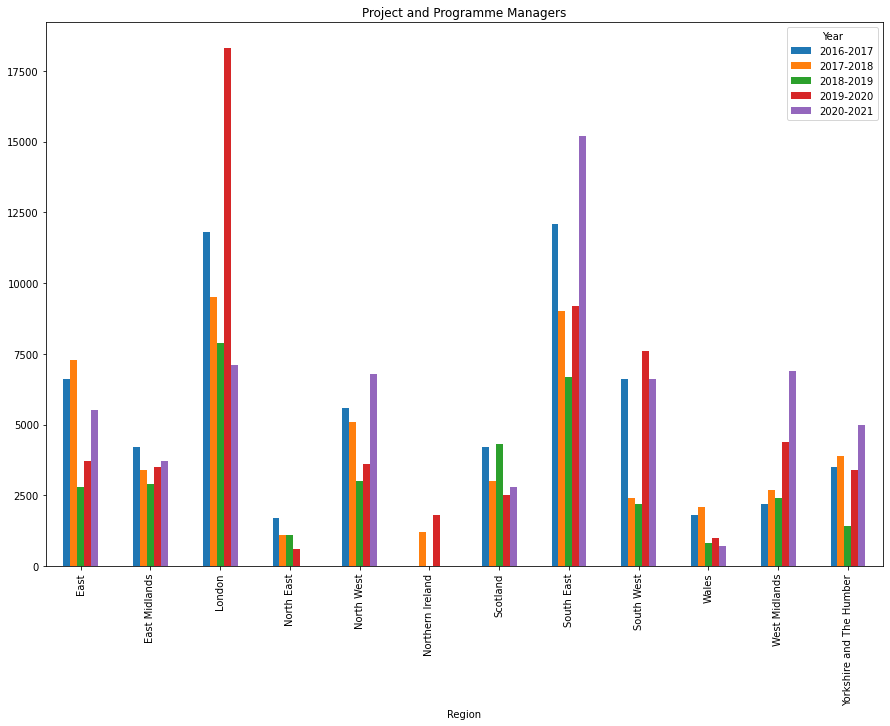

In [62]:
# bar plot based on the pivot table Project and Programme Managers
ax = Project_ProgManagers_2.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Project and Programme Managers')

plt.show()

In [63]:
# pivot table for Specialist Managers
Specialist_Managers_2 = males_copy.pivot('Region','Year','Specialist Managers')

# view the pivot table
Specialist_Managers_2

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,15800.0,13700.0,15100.0,21000.0,14000.0
East Midlands,10900.0,9600.0,10300.0,12200.0,14100.0
London,26600.0,29300.0,37100.0,32300.0,35600.0
North East,4100.0,2900.0,4400.0,4600.0,NaN
North West,12700.0,13600.0,13100.0,15500.0,17000.0
Northern Ireland,NaN,1600.0,NaN,1900.0,NaN
Scotland,8400.0,10100.0,9000.0,11500.0,16400.0
South East,35800.0,29500.0,39800.0,26400.0,34100.0
South West,12300.0,10400.0,11500.0,9900.0,12600.0


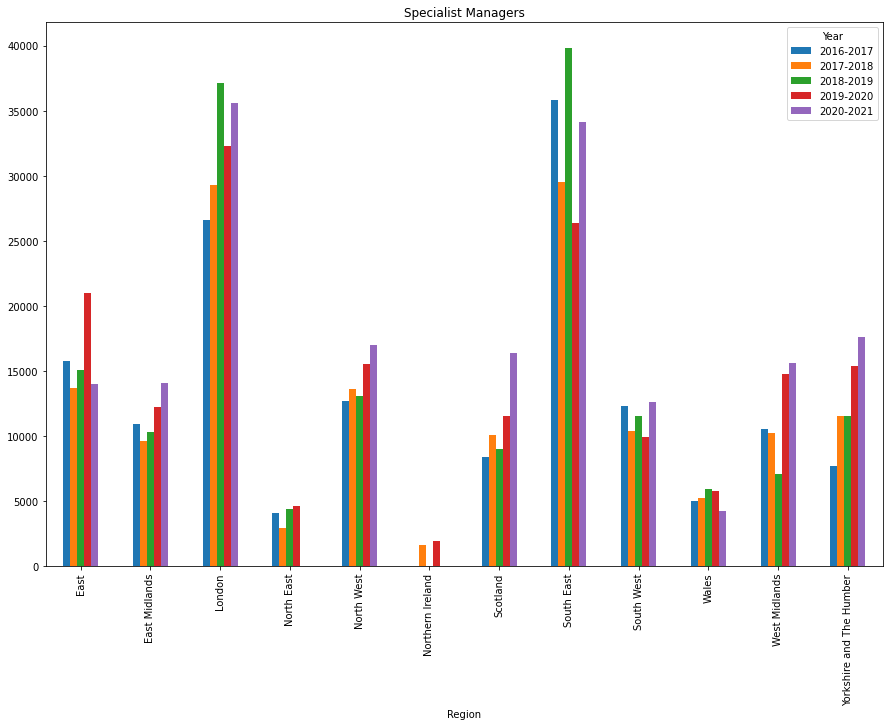

In [64]:
# bar plot based on the pivot table Specialist Managers
ax = Specialist_Managers_2.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Specialist Managers')

plt.show()

In [65]:
# pivot table for Web design and development professionals 
Web_design_dev_prof_2 = males_copy.pivot('Region','Year','Web design and development professionals')

# view the pivot table
Web_design_dev_prof_2

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
Region,,,,,
East,5600.0,3800.0,3500.0,6200.0,7300.0
East Midlands,4000.0,2600.0,1800.0,1000.0,1900.0
London,8600.0,7800.0,8300.0,9700.0,9500.0
North East,2100.0,1900.0,2100.0,1500.0,NaN
North West,5300.0,4700.0,2700.0,6400.0,6100.0
Northern Ireland,NaN,600.0,NaN,1300.0,NaN
Scotland,3100.0,2900.0,4500.0,3200.0,1800.0
South East,10700.0,6700.0,6100.0,5500.0,8300.0
South West,3500.0,3800.0,5100.0,8000.0,4000.0


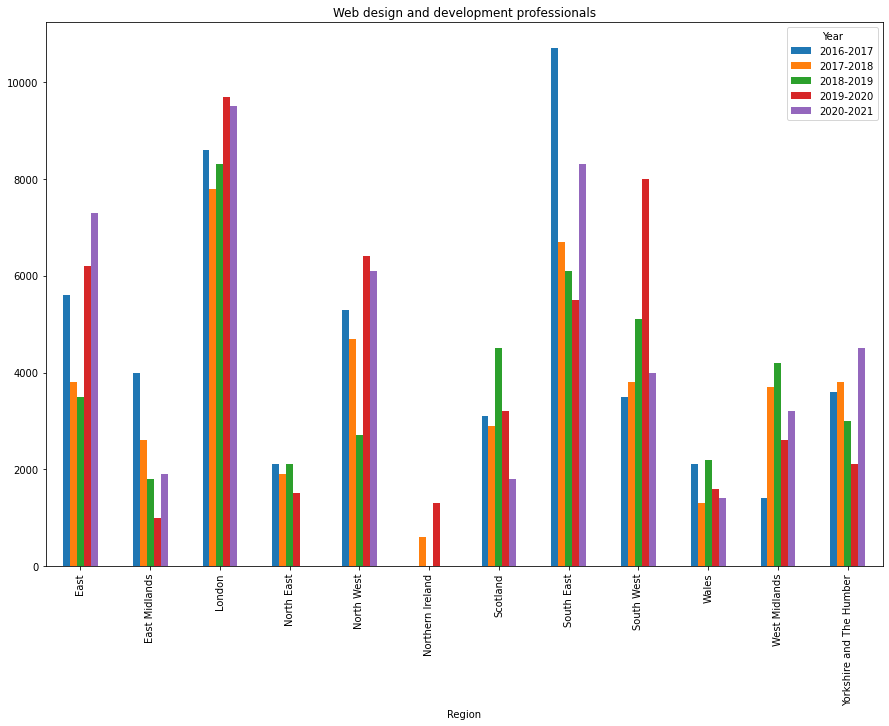

In [66]:
# bar plot based on the pivot table Web design and development professionals
ax = Web_design_dev_prof_2.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(15, 10)

plt.title('Web design and development professionals')

plt.show()

### Percentage Change

### Females 

In [67]:
Project_ProgManagers_pct = (females_copy.pivot('Year','Region','Project and Programme Managers').pct_change()*100)

Specialist_Managers_pct = (females_copy.pivot('Year','Region','Specialist Managers').pct_change()*100)

In [68]:
print('Percentage change for female Specialist Managers')
Specialist_Managers_pct

Percentage change for female Specialist Managers


Region,East,East Midlands,London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber
Year,,,,,,,,,,,,
2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018,32.258065,0.000000,0.000000,70.0,15.625000,NaN,77.272727,-17.307692,-22.222222,0.000000,-7.407407,29.411765
2018-2019,-39.024390,115.789474,-5.633803,0.0,5.405405,NaN,-58.974359,83.720930,33.333333,100.000000,0.000000,-31.818182
2019-2020,104.000000,0.000000,68.656716,0.0,0.000000,NaN,56.250000,-10.126582,28.571429,-50.000000,-4.000000,-50.000000
2020-2021,43.137255,-9.756098,30.973451,0.0,69.230769,NaN,72.000000,12.676056,11.111111,122.222222,54.166667,140.000000


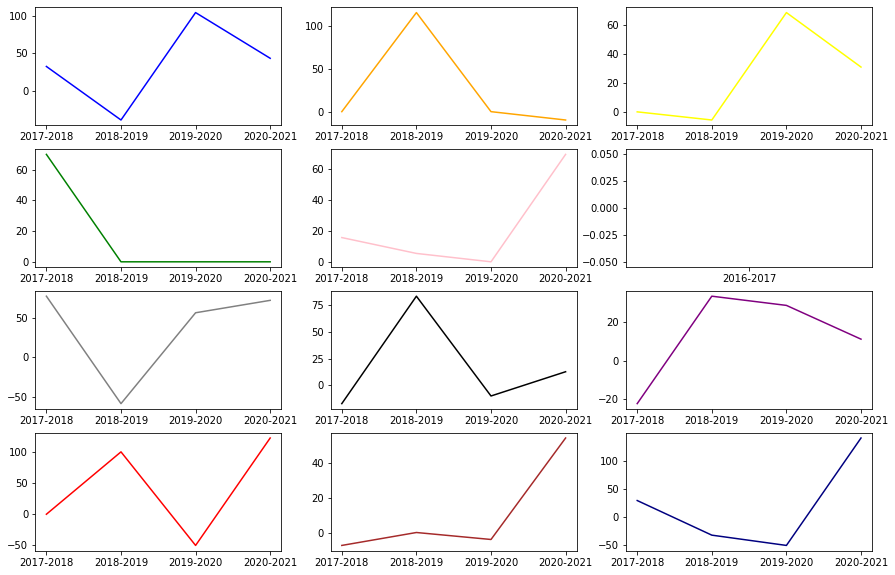

In [69]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(431)
plt.plot(Specialist_Managers_pct['East'], color='Blue')

ax = fig.add_subplot(432)
plt.plot(Specialist_Managers_pct['East Midlands'], color='Orange')

ax = fig.add_subplot(433)
plt.plot(Specialist_Managers_pct['London'], color='Yellow')

ax = fig.add_subplot(434)
plt.plot(Specialist_Managers_pct['North East'], color='Green')

ax = fig.add_subplot(435)
plt.plot(Specialist_Managers_pct['North West'], color='Pink')

ax = fig.add_subplot(436)
plt.plot(Specialist_Managers_pct['Northern Ireland'], color='Teal')

ax = fig.add_subplot(437)
plt.plot(Specialist_Managers_pct['Scotland'], color='Grey')

ax = fig.add_subplot(438)
plt.plot(Specialist_Managers_pct['South East'], color='Black')

ax = fig.add_subplot(439)
plt.plot(Specialist_Managers_pct['South West'], color='Purple')

ax = fig.add_subplot(4,3,10)
plt.plot(Specialist_Managers_pct['Wales'], color='Red')

ax = fig.add_subplot(4,3,11)
plt.plot(Specialist_Managers_pct['West Midlands'], color='Brown')

ax = fig.add_subplot(4,3,12)
plt.plot(Specialist_Managers_pct['Yorkshire and The Humber'], color='Navy')

In [70]:
print('Percentage change for female Project and Programme Managers')
Project_ProgManagers_pct

Percentage change for female Project and Programme Managers


Region,East,East Midlands,London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber
Year,,,,,,,,,,,,
2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018,-33.333333,0.000000,-6.250000,-50.0,122.222222,NaN,26.666667,2.380952,-27.272727,0.000000,9.090909,137.500000
2018-2019,-31.818182,88.888889,-60.000000,0.0,5.000000,NaN,-31.578947,-69.767442,12.500000,0.000000,0.000000,-89.473684
2019-2020,-13.333333,0.000000,120.833333,0.0,-28.571429,NaN,-15.384615,115.384615,55.555556,66.666667,116.666667,700.000000
2020-2021,61.538462,5.882353,20.754717,0.0,13.333333,NaN,163.636364,53.571429,57.142857,-40.000000,-61.538462,43.750000


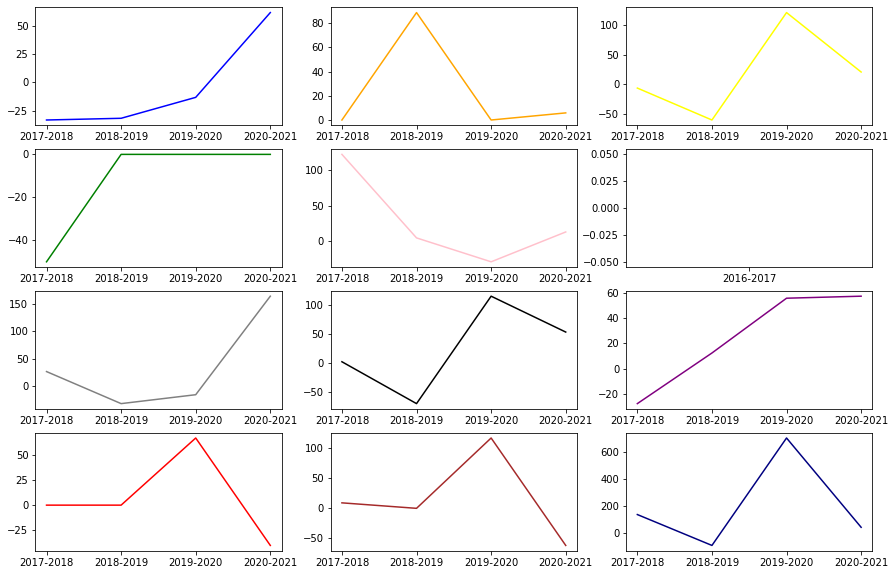

In [71]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(431)
plt.plot(Project_ProgManagers_pct['East'], color='Blue')

ax = fig.add_subplot(432)
plt.plot(Project_ProgManagers_pct['East Midlands'], color='Orange')

ax = fig.add_subplot(433)
plt.plot(Project_ProgManagers_pct['London'], color='Yellow')

ax = fig.add_subplot(434)
plt.plot(Project_ProgManagers_pct['North East'], color='Green')

ax = fig.add_subplot(435)
plt.plot(Project_ProgManagers_pct['North West'], color='Pink')

ax = fig.add_subplot(436)
plt.plot(Project_ProgManagers_pct['Northern Ireland'], color='Teal')

ax = fig.add_subplot(437)
plt.plot(Project_ProgManagers_pct['Scotland'], color='Grey')

ax = fig.add_subplot(438)
plt.plot(Project_ProgManagers_pct['South East'], color='Black')

ax = fig.add_subplot(439)
plt.plot(Project_ProgManagers_pct['South West'], color='Purple')

ax = fig.add_subplot(4,3,10)
plt.plot(Project_ProgManagers_pct['Wales'], color='Red')

ax = fig.add_subplot(4,3,11)
plt.plot(Project_ProgManagers_pct['West Midlands'], color='Brown')

ax = fig.add_subplot(4,3,12)
plt.plot(Project_ProgManagers_pct['Yorkshire and The Humber'], color='Navy')

### Males

In [72]:
Project_ProgManagers_2_pct = (males_copy.pivot('Year','Region','Project and Programme Managers').pct_change()*100)

Specialist_Managers_2_pct = (males_copy.pivot('Year','Region','Specialist Managers').pct_change()*100)

In [73]:
print('Percentage change for male Specialist Managers')
Specialist_Managers_2_pct

Percentage change for male Specialist Managers


Region,East,East Midlands,London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber
Year,,,,,,,,,,,,
2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018,-13.291139,-11.926606,10.150376,-29.268293,7.086614,NaN,20.238095,-17.597765,-15.447154,4.000000,-2.857143,49.350649
2018-2019,10.218978,7.291667,26.621160,51.724138,-3.676471,0.00,-10.891089,34.915254,10.576923,13.461538,-30.392157,0.000000
2019-2020,39.072848,18.446602,-12.938005,4.545455,18.320611,18.75,27.777778,-33.668342,-13.913043,-1.694915,108.450704,33.913043
2020-2021,-33.333333,15.573770,10.216718,0.000000,9.677419,0.00,42.608696,29.166667,27.272727,-27.586207,5.405405,14.285714


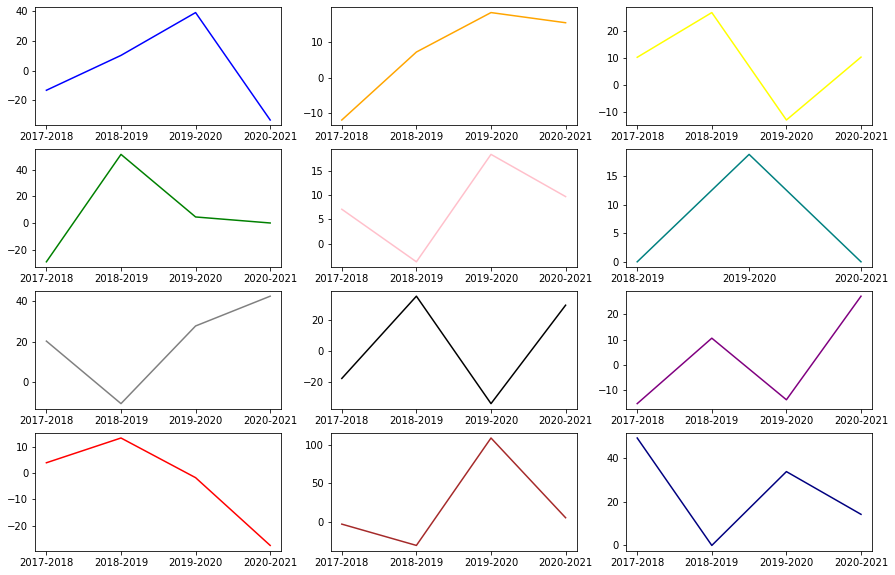

In [74]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(431)
plt.plot(Specialist_Managers_2_pct['East'], color='Blue')

ax = fig.add_subplot(432)
plt.plot(Specialist_Managers_2_pct['East Midlands'], color='Orange')

ax = fig.add_subplot(433)
plt.plot(Specialist_Managers_2_pct['London'], color='Yellow')

ax = fig.add_subplot(434)
plt.plot(Specialist_Managers_2_pct['North East'], color='Green')

ax = fig.add_subplot(435)
plt.plot(Specialist_Managers_2_pct['North West'], color='Pink')

ax = fig.add_subplot(436)
plt.plot(Specialist_Managers_2_pct['Northern Ireland'], color='Teal')

ax = fig.add_subplot(437)
plt.plot(Specialist_Managers_2_pct['Scotland'], color='Grey')

ax = fig.add_subplot(438)
plt.plot(Specialist_Managers_2_pct['South East'], color='Black')

ax = fig.add_subplot(439)
plt.plot(Specialist_Managers_2_pct['South West'], color='Purple')

ax = fig.add_subplot(4,3,10)
plt.plot(Specialist_Managers_2_pct['Wales'], color='Red')

ax = fig.add_subplot(4,3,11)
plt.plot(Specialist_Managers_2_pct['West Midlands'], color='Brown')

ax = fig.add_subplot(4,3,12)
plt.plot(Specialist_Managers_2_pct['Yorkshire and The Humber'], color='Navy')

In [75]:
print('Percentage change for male Project and Programme Managers')
Project_ProgManagers_2_pct

Percentage change for male Project and Programme Managers


Region,East,East Midlands,London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber
Year,,,,,,,,,,,,
2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018,10.606061,-19.047619,-19.491525,-35.294118,-8.928571,NaN,-28.571429,-25.619835,-63.636364,16.666667,22.727273,11.428571
2018-2019,-61.643836,-14.705882,-16.842105,0.000000,-41.176471,0.0,43.333333,-25.555556,-8.333333,-61.904762,-11.111111,-64.102564
2019-2020,32.142857,20.689655,131.645570,-45.454545,20.000000,50.0,-41.860465,37.313433,245.454545,25.000000,83.333333,142.857143
2020-2021,48.648649,5.714286,-61.202186,0.000000,88.888889,0.0,12.000000,65.217391,-13.157895,-30.000000,56.818182,47.058824


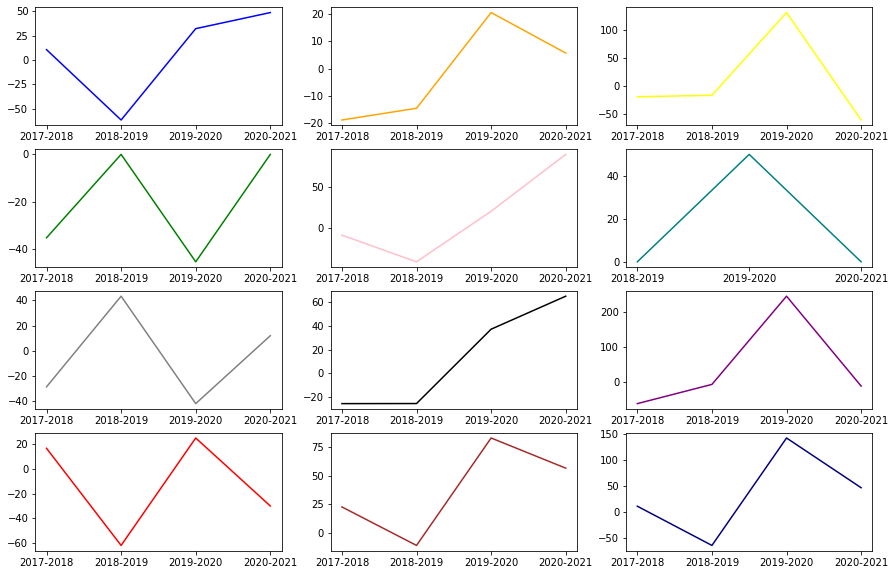

In [76]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(431)
plt.plot(Project_ProgManagers_2_pct['East'], color='Blue')

ax = fig.add_subplot(432)
plt.plot(Project_ProgManagers_2_pct['East Midlands'], color='Orange')

ax = fig.add_subplot(433)
plt.plot(Project_ProgManagers_2_pct['London'], color='Yellow')

ax = fig.add_subplot(434)
plt.plot(Project_ProgManagers_2_pct['North East'], color='Green')

ax = fig.add_subplot(435)
plt.plot(Project_ProgManagers_2_pct['North West'], color='Pink')

ax = fig.add_subplot(436)
plt.plot(Project_ProgManagers_2_pct['Northern Ireland'], color='Teal')

ax = fig.add_subplot(437)
plt.plot(Project_ProgManagers_2_pct['Scotland'], color='Grey')

ax = fig.add_subplot(438)
plt.plot(Project_ProgManagers_2_pct['South East'], color='Black')

ax = fig.add_subplot(439)
plt.plot(Project_ProgManagers_2_pct['South West'], color='Purple')

ax = fig.add_subplot(4,3,10)
plt.plot(Project_ProgManagers_2_pct['Wales'], color='Red')

ax = fig.add_subplot(4,3,11)
plt.plot(Project_ProgManagers_2_pct['West Midlands'], color='Brown')

ax = fig.add_subplot(4,3,12)
plt.plot(Project_ProgManagers_2_pct['Yorkshire and The Humber'], color='Navy')

### Pie Charts to show the percentage of males and females in web design from 2016 - 2021

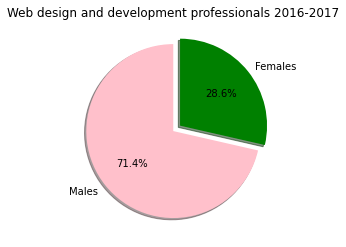

In [77]:
slices = [Web_design_dev_prof_2['2016-2017'].sum(), Web_design_dev_prof['2016-2017'].sum()]

activities = ['Males','Females']

cols = ['pink','green']

plt.pie(
    slices,
    labels=activities,
    colors=cols,
    startangle=90,
    shadow= True,
    explode=(0,0.1),
    autopct='%0.1f%%'
)
plt.title ('Web design and development professionals 2016-2017')
plt.show()

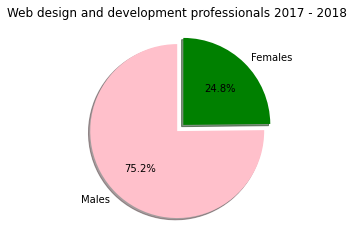

In [78]:
slices = [Web_design_dev_prof_2['2017-2018'].sum(), Web_design_dev_prof['2017-2018'].sum()]

activities = ['Males','Females']

cols = ['pink','green']

plt.pie(
    slices,
    labels=activities,
    colors=cols,
    startangle=90,
    shadow= True,
    explode=(0,0.1),
    autopct='%0.1f%%'
)
plt.title ('Web design and development professionals 2017 - 2018')
plt.show()

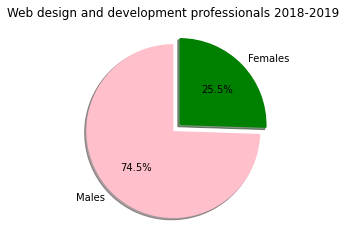

In [79]:
slices = [Web_design_dev_prof_2['2018-2019'].sum(), Web_design_dev_prof['2018-2019'].sum()]

activities = ['Males','Females']

cols = ['pink','green']

plt.pie(
    slices,
    labels=activities,
    colors=cols,
    startangle=90,
    shadow= True,
    explode=(0,0.1),
    autopct='%0.1f%%'
)
plt.title ('Web design and development professionals 2018-2019')
plt.show()

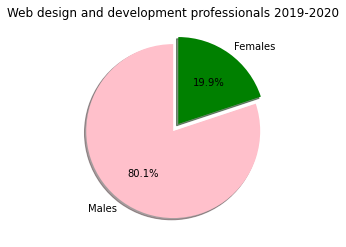

In [80]:
slices = [Web_design_dev_prof_2['2019-2020'].sum(), Web_design_dev_prof['2019-2020'].sum()]

activities = ['Males','Females']

cols = ['pink','green']

plt.pie(
    slices,
    labels=activities,
    colors=cols,
    startangle=90,
    shadow= True,
    explode=(0,0.1),
    autopct='%0.1f%%'
)
plt.title ('Web design and development professionals 2019-2020')
plt.show()

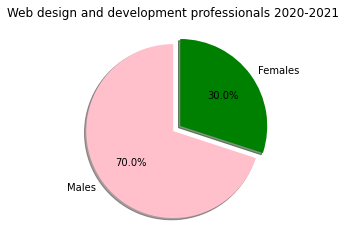

In [81]:
slices = [Web_design_dev_prof_2['2020-2021'].sum(), Web_design_dev_prof['2020-2021'].sum()]

activities = ['Males','Females']

cols = ['pink','green']

plt.pie(
    slices,
    labels=activities,
    colors=cols,
    startangle=90,
    shadow= True,
    explode=(0,0.1),
    autopct='%0.1f%%'
)
plt.title ('Web design and development professionals 2020-2021')
plt.show()

### finding the correlation between Males and Females using different seaborn features.
### 1- using hex bins

In [85]:
males_copy.columns

Index(['Region', 'Year', 'Information Technology and Telecommunications',
       'Specialist Managers', 'Project and Programme Managers',
       'Business Analysts, Architects and System Designers',
       'Programmers and Software Development Professionals',
       'Web design and development professionals',
       'Information Technology and Telecommunications Professionals n.e.c'],
      dtype='object')

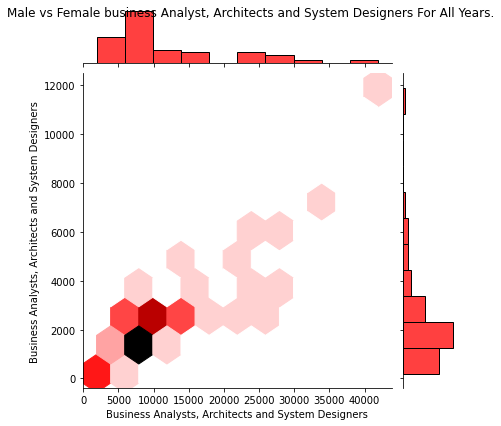

In [86]:
#joinplot using hex bins to show the correlation between female  and male business Analyst, Architects and System Designers.

X=males_copy[ 'Business Analysts, Architects and System Designers']
Y=females_copy['Business Analysts, Architects and System Designers']
fig1= sns.jointplot(x=X,y=Y,kind="hex", color="red")
fig1.fig.suptitle('Male vs Female business Analyst, Architects and System Designers For All Years.')
plt.show()

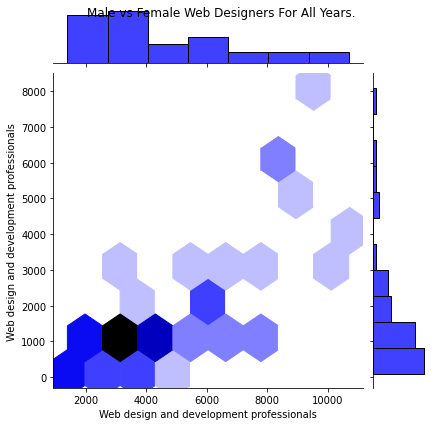

In [87]:
#joinplot using hex bins to show the correlation between female and male Web Designers.

X=males_copy['Web design and development professionals']
Y=females_copy['Web design and development professionals']
fig1= sns.jointplot(x=X,y=Y,kind="hex", color="blue")
fig1.fig.suptitle('Male vs Female Web Designers For All Years.')
plt.show()

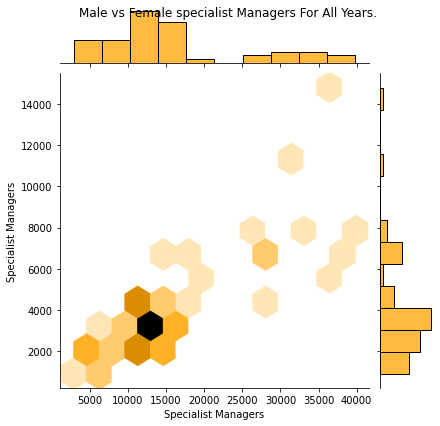

In [88]:
#joinplot using hex bins to show the correlation between female and male specialist Managers.

X=males_copy['Specialist Managers']
Y=females_copy['Specialist Managers']
fig1= sns.jointplot(x=X ,y=Y,kind="hex", color="orange")
fig1.fig.suptitle('Male vs Female specialist Managers For All Years.')
plt.show()

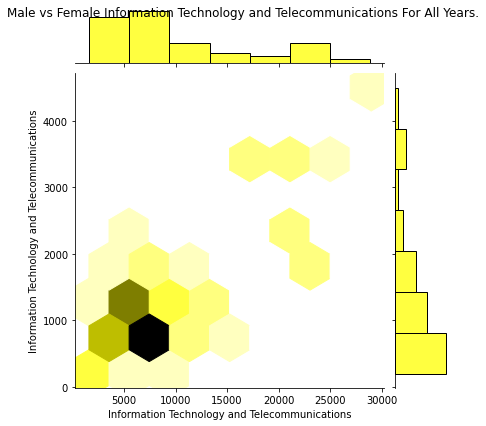

In [89]:
#joinplot using hex bins to show the correlation between female and male in Information Technology and Telecommunications.

X=males_copy['Information Technology and Telecommunications']
Y=females_copy['Information Technology and Telecommunications']
fig1= sns.jointplot(x=X ,y=Y,kind="hex", color="yellow")
fig1.fig.suptitle('Male vs Female Information Technology and Telecommunications For All Years.')
plt.show()

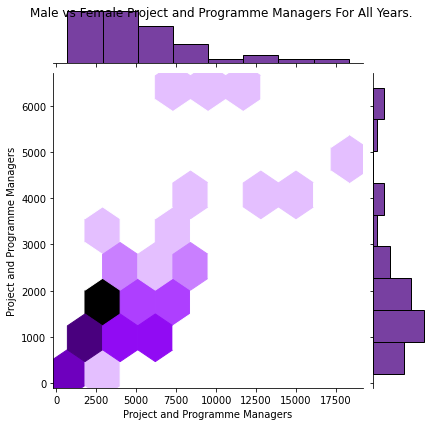

In [90]:
#joinplot using hex bins to show the correlation between female and male Project and Programme Managers.

X=males_copy['Project and Programme Managers']
Y=females_copy['Project and Programme Managers']
fig1= sns.jointplot(x=X ,y=Y,kind="hex", color="indigo")
fig1.fig.suptitle('Male vs Female Project and Programme Managers For All Years.')
plt.show()

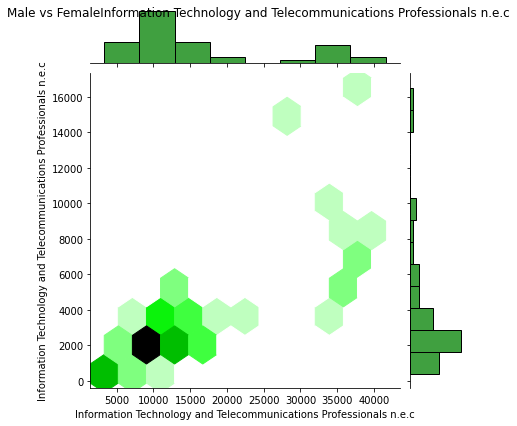

In [91]:
#joinplot using hex bins to show the correlation between female and male in Information Technology and Telecommunications Professionals n.e.c

X=males_copy['Information Technology and Telecommunications Professionals n.e.c']
Y=females_copy['Information Technology and Telecommunications Professionals n.e.c']
fig1= sns.jointplot(x=X ,y=Y,kind="hex", color="green")
fig1.fig.suptitle('Male vs FemaleInformation Technology and Telecommunications Professionals n.e.c')
plt.show()

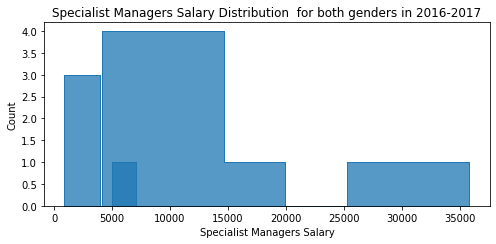

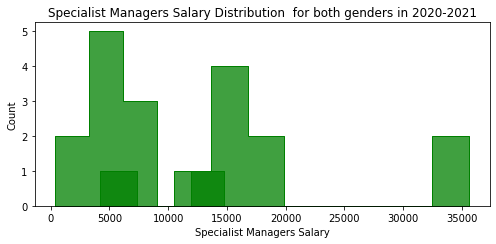

In [92]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
# Histogram Plot showing dataset of specialist Managers in 2016-2017.
#darker colour shows the female data set whereas the lighter colour shows the male dataset
x = males_copy[males_copy['Year']=='2016-2017'].loc[:,"Specialist Managers"]
y = females_copy[females_copy['Year']=='2016-2017'].loc[:,"Specialist Managers"]
fig1, ax = plt.subplots()
for a in [x,y]:
    sns.histplot(a,ax=ax,kde=False,element = 'step')
plt.xlabel('Specialist Managers Salary')
plt.title('Specialist Managers Salary Distribution  for both genders in 2016-2017')
plt.show()

# Histogram Plot showing dataset of specialist Managers in 2020-2020.
#darker colour shows the female data set whereas the lighter colour shows the male dataset

# x1 = males_copy[males_copy['Year']=='2020-2021'].loc[:,"Specialist Managers"]
# y1 = females_copy[females_copy['Year']=='2020-2021'].loc[:,"Specialist Managers"]
# fig1, ax = plt.subplots()
# for a in [x1,y1]:
#     sns.histplot(a,ax=ax,kde=False,element = 'step', color = 'green')
# plt.xlabel('Male Specialist Managers Salary')
# plt.title('Specialist Managers Salary Distribution for both genders in 2020-2021')
# plt.show()


x = males_copy[males_copy['Year']=='2020-2021'].loc[:,"Specialist Managers"]
y = females_copy[females_copy['Year']=='2020-2021'].loc[:,"Specialist Managers"]
fig1, ax = plt.subplots()
for a in [x,y]:
    sns.histplot(a,ax=ax,kde=False,element = 'step',color ='green')
    plt.xlabel('Specialist Managers Salary')
plt.title('Specialist Managers Salary Distribution  for both genders in 2020-2021')
plt.show()